In [8]:
import postgres
import pandas as pd
import numpy as np

In [9]:
import psycopg2

In [10]:
from io import StringIO

In [11]:
import db_con

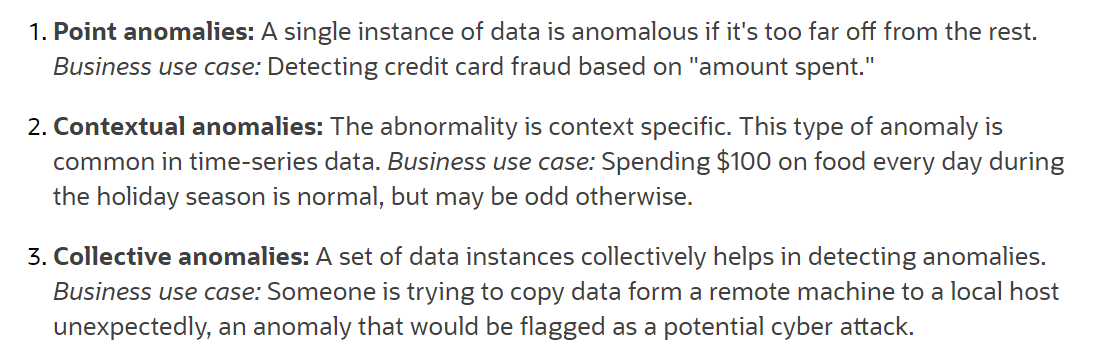

# Read SQL-FR-SQLN-11 Anomaly

In [12]:
df_11 = pd.read_csv('/home/ubuntu/Zabbix/Data/MODEL_DATA/Anomaly_Data/SRV_FR_SQLN_11/SRV_FR_SQLN_11_ANOMALY.csv')

In [13]:
# df_11.head()
list(df_11.dtypes)


[dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),

# DB Connection

In [244]:
conn = psycopg2.connect(user = db_con.user,
                        password = db_con.password, 
                                  host = db_con.host, 
                                  port = db_con.port,
                                  database = db_con.database) 



In [204]:
query = """CREATE TABLE SRV_FR_SQLN_11_ANOMALY""" + " (" + '"' + """'Date_Time'""" + '"' + " timestamp NULL,"

In [205]:
query

'CREATE TABLE SRV_FR_SQLN_11_ANOMALY ("\'Date_Time\'" timestamp NULL,'

In [192]:
table_col = []
for col in list(df_11.columns)[1:]:
#     if 'traffic' in col:
    
    temp_col = col.replace("-","").replace(" ","_").replace("Outgoing_network_traffic", "OUT_Traffic").replace("Incoming_network_traffic","IN_Traffic")\
                    .replace("_vmxnet3_Ethernet_Adapter","_")

    #     \
#     .replace("/").replace(":", "_").replace("\\","_").replace("SQL_Server,","SQL_Server_")
    
#     temp_col = temp_col.replace('''(''',"").replace(''')''','')
#     print(temp_col, "-->",len(temp_col))
    
    table_col.append('"' + "'" + temp_col + "'" + '"')

#     if len(temp_col) > 60:
#         print(temp_col)
        

    
    
    # print("---")    
# for col in list(df_11.columns)[1:]:
#     if len(col) > 60:
#         print(col)

In [172]:
# table_col

In [206]:
t_query = ''
for col in table_col:
    t_query = t_query + col + ' numeric ' + 'NULL,'

In [207]:
final_query = query + t_query[:-1] + " )" + ";"

In [208]:
print(final_query )

# = final_query.

CREATE TABLE SRV_FR_SQLN_11_ANOMALY ("'Date_Time'" timestamp NULL,"'Total_disk_space_on_K:'" numeric NULL,"'Total_disk_space_on_J:'" numeric NULL,"'Total_disk_space_on_N:\LOGS'" numeric NULL,"'Total_disk_space_on_N:'" numeric NULL,"'SQL_Server,_Locks:_Lock_Waits_per_second_(Total)'" numeric NULL,"'SQL_Server,_Buffer_Manager:_Page_reads/sec'" numeric NULL,"'OUT_Traffic_on_WFP_Native_MAC_Layer_LightWeight_Filter0000'" numeric NULL,"'SQL_Server,_Locks:_Number_of_Deadlocks/sec_(Total)'" numeric NULL,"'Free_disk_space_on_V:'" numeric NULL,"'Total_disk_space_on_Q:\LOGS'" numeric NULL,"'SQL_Server,_Buffer_Manager:_Checkpoint_pages/sec'" numeric NULL,"'Free_disk_space_on_F:'" numeric NULL,"'Free_disk_space_on_N:'" numeric NULL,"'Total_disk_space_on_G:'" numeric NULL,"'Processor_load_(5_min_average)'" numeric NULL,"'IN_Traffic_on_WFP_Native_MAC_Layer_LightWeight_Filter0000'" numeric NULL,"'Total_disk_space_on_I:\LOGS'" numeric NULL,"'SQL_Server,_Statistics:_Failed_AutoParams/sec'" numeric NULL,

In [235]:
# Create table
cursor = conn.cursor()
cursor.execute(str(final_query))
print("Table created successfully")

conn.commit()
# connection.close()


Table created successfully


In [222]:
col_list = []
col_list.append(str('Date_Time'))

In [223]:
col_list + table_col

['Date_Time',
 '"\'Total_disk_space_on_K:\'"',
 '"\'Total_disk_space_on_J:\'"',
 '"\'Total_disk_space_on_N:\\LOGS\'"',
 '"\'Total_disk_space_on_N:\'"',
 '"\'SQL_Server,_Locks:_Lock_Waits_per_second_(Total)\'"',
 '"\'SQL_Server,_Buffer_Manager:_Page_reads/sec\'"',
 '"\'OUT_Traffic_on_WFP_Native_MAC_Layer_LightWeight_Filter0000\'"',
 '"\'SQL_Server,_Locks:_Number_of_Deadlocks/sec_(Total)\'"',
 '"\'Free_disk_space_on_V:\'"',
 '"\'Total_disk_space_on_Q:\\LOGS\'"',
 '"\'SQL_Server,_Buffer_Manager:_Checkpoint_pages/sec\'"',
 '"\'Free_disk_space_on_F:\'"',
 '"\'Free_disk_space_on_N:\'"',
 '"\'Total_disk_space_on_G:\'"',
 '"\'Processor_load_(5_min_average)\'"',
 '"\'IN_Traffic_on_WFP_Native_MAC_Layer_LightWeight_Filter0000\'"',
 '"\'Total_disk_space_on_I:\\LOGS\'"',
 '"\'SQL_Server,_Statistics:_Failed_AutoParams/sec\'"',
 '"\'SQL_Server,_Buffer_Manager:_Database_pages\'"',
 '"\'Total_disk_space_on_H:\\LOGS\'"',
 '"\'Free_disk_space_on_P:\'"',
 '"\'SQL_Server,_Buffer_Manager:_Page_life_expectan

In [247]:
print(table_col[-3])

"'SQL_Server,_Cache:_Cache_Hit_Ratio'"


In [229]:
final_col_list = col_list + table_col

In [242]:
final_col_list = [x.lower() for x in final_col_list]

In [245]:
# Connection to db

conn = psycopg2.connect(user = db_con.user,
                        password = db_con.password, 
                                  host = db_con.host, 
                                  port = db_con.port,
                                  database = db_con.database) 




# Initialize a string buffer
sio = StringIO()
sio.write(df_11.to_csv(index=None, header=None))  # Write the Pandas DataFrame as a csv to the buffer
sio.seek(0)  # Be sure to reset the position to the start of the stream

# Copy the string buffer to the database, as if it were an actual file
with conn.cursor() as c:
    c.copy_from(sio, "srv_fr_sqln_11_anomaly", columns=final_col_list, sep=',') # col_list + table_col
    conn.commit()

UndefinedColumn: column "date_time" of relation "srv_fr_sqln_11_anomaly" does not exist


In [257]:
sum([1,2,-3])/3

0.0

In [259]:
3.5*4 -8 

6.0

In [260]:
def find(a):
    sum_ = 0
    for i in [1,5,7,7]:
        sum_ = sum_ + (a - i)
    return sum_

In [273]:
find(1)

-16

In [275]:
test_list = [-5,-1,2,4]

In [276]:
mean = sum(test_list) / len(test_list) 
variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
res = variance ** 0.5

print(res)

3.391164991562634


In [287]:
# Variance unbiased

def var_plus_x(li):
    n = len(li)
    mean = sum(li)/n
    s = 0
    for i in li:
        s = s + (i - mean)**2
        
    t = sum([((x - mean) ** 2) for x in li]) / (n-1)
    return t,s/(n-1)

# Biased

def var_x(li):
    n = len(li)
    mean = sum(li)/n
    s = 0
    for i in li:
        s = s + (i - mean)**2
    return s//(n)

In [302]:
# var_plus_x([9,8,3,5,9])
var_plus_x([-40,-3,-1,0,1,3,40])

(536.6666666666666, 536.6666666666666)

In [304]:

((((2/1.35)**2)*7)/6)**0.5

1.6001828884957678

In [321]:
v1 = [2,8,3,5,2,5,2,6,3,5,2,1]
v2 = [7,13,8,10,7,10,7,11,8,10,7,6]

print(var_x(v1))
print(var_x(v2))


4.0
4.0


In [323]:
import numpy as np
ar= np.array([1,1,2,2,2,3,3])
np.std(ar, ddof=1)

0.816496580927726

In [329]:
ar1 = np.array([11,11,12,12,12,13,13])
np.std(ar1, ddof = 1)

0.816496580927726

# Clustering

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [15]:
from scipy.spatial.distance import cdist

In [16]:
df_11.head()

Date_Time  Total disk space on K:  Total disk space on J:  \
0  2020-06-16 05:17:00            8.938692e+11            9.663355e+10   
1  2020-06-16 05:18:00            8.938692e+11            9.663355e+10   
2  2020-06-16 05:19:00            8.938692e+11            9.663355e+10   
3  2020-06-16 05:20:00            8.938692e+11            9.663355e+10   
4  2020-06-16 05:21:00            8.938692e+11            9.663355e+10   

   Total disk space on N:\LOGS  Total disk space on N:  \
0                 5.365498e+09            2.899071e+11   
1                 5.365498e+09            2.899071e+11   
2                 5.365498e+09            2.899071e+11   
3                 5.365498e+09            2.899071e+11   
4                 5.365498e+09            2.899071e+11   

   SQL Server, Locks: Lock Waits per second (Total)  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   SQL Server, Buffer Manager: Page reads/sec  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
0                                          1914432.0                                                   
1                                          1760608.0                                                   
2                                          1820848.0                                                   
3                                          1720624.0                                                   
4                                          2609184.0                                                   

   SQL Server, Locks: Number of Deadlocks/sec (Total)  Free disk space on V:  \
0                                                0.0            1.661783e+10   
1                                                0.0            1.661783e+10   
2                                                0.0            1.661783e+10   
3                                                0.0            1.661783e+10   
4                                                0.0            1.661783e+10   

   ...  Free disk space on R:\LOGS  Free disk space on G:  \
0  ...                5.037883e+09           4.036710e+10   
1  ...                5.037883e+09           4.036710e+10   
2  ...                5.037883e+09           4.036710e+10   
3  ...                5.037883e+09           4.036710e+10   
4  ...                5.037883e+09           4.036710e+10   

   Free disk space on N:\LOGS  Free disk space on H:\LOGS  \
0                3.435790e+09                4.689887e+09   
1                3.435790e+09                4.689887e+09   
2                3.435790e+09                4.689887e+09   
3                3.435790e+09                4.689887e+09   
4                3.435790e+09                4.689887e+09   

   Free disk space on Q:  SQL Server, Memory Manager: Memory Grants Pending  \
0           3.090481e+10                                                0.0   
1           3.090481e+10                                                0.0   
2           3.090481e+10                                                0.0   
3           3.090481e+10                                                0.0   
4           3.090481e+10                                                0.0   

   Free disk space on S:  SQL Server, Cache: Cache Hit Ratio  Anomaly  \
0           1.396507e+10                             81.8883        1   
1           1.396507e+10                             87.7246        1   
2           1.396507e+10                             81.251

In [22]:
data = df_11[df_11['Anomaly'] == -1].iloc[:,1:-1]

In [18]:
data = df_11.iloc[:,1:]

In [24]:
data.shape

(149, 136)

In [45]:
data.columns

Index(['Total disk space on K:', 'Total disk space on J:',
       'Total disk space on N:\LOGS', 'Total disk space on N:',
       'SQL Server, Locks: Lock Waits per second (Total)',
       'SQL Server, Buffer Manager: Page reads/sec',
       'Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000',
       'SQL Server, Locks: Number of Deadlocks/sec (Total)',
       'Free disk space on V:', 'Total disk space on Q:\LOGS',
       ...
       'Free disk space on R:\LOGS', 'Free disk space on G:',
       'Free disk space on N:\LOGS', 'Free disk space on H:\LOGS',
       'Free disk space on Q:',
       'SQL Server, Memory Manager: Memory Grants Pending',
       'Free disk space on S:', 'SQL Server, Cache: Cache Hit Ratio',
       'Anomaly', 'label'],
      dtype='object', length=137)

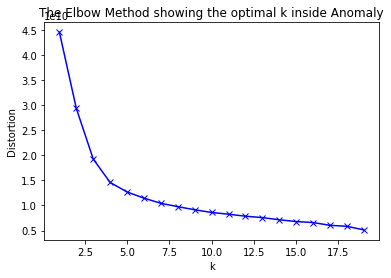

In [25]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data.values)
    kmeanModel.fit(data.values)
    distortions.append(sum(np.min(cdist(data.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k inside Anomaly')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=17, random_state=0).fit(data.values)
result= kmeans.labels_

In [30]:
result

array([ 0, 16,  3,  3, 12, 10, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 14,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  4,  1,  1,
        1, 14,  1,  1,  1,  1,  1,  8, 15,  8,  8,  8,  8, 13,  8,  8,  3,
       13,  0, 10,  8, 13,  8,  0,  8,  8,  8,  8,  8, 13,  4,  0,  3,  3,
        3,  0,  6,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3,  0,  0,  0,  7,
        7,  7,  7,  7,  9,  2,  2,  5,  2,  2,  2,  2,  2], dtype=int32)

In [31]:
data['label']=result

In [36]:
data['label'].unique()

array([ 0, 16,  3, 12, 10, 11,  1, 14,  4,  8, 15, 13,  6,  7,  9,  2,  5],
      dtype=int32)

In [37]:
# print(data.groupby('label').head())


In [39]:
data[data['label'] == 0].describe()

Total disk space on K:  Total disk space on J:  \
count            1.600000e+01            1.600000e+01   
mean             8.589902e+11            9.663355e+10   
std              0.000000e+00            0.000000e+00   
min              8.589902e+11            9.663355e+10   
25%              8.589902e+11            9.663355e+10   
50%              8.589902e+11            9.663355e+10   
75%              8.589902e+11            9.663355e+10   
max              8.589902e+11            9.663355e+10   

       Total disk space on N:\LOGS  Total disk space on N:  \
count                 1.600000e+01            1.600000e+01   
mean                  5.365498e+09            2.899071e+11   
std                   0.000000e+00            0.000000e+00   
min                   5.365498e+09            2.899071e+11   
25%                   5.365498e+09            2.899071e+11   
50%                   5.365498e+09            2.899071e+11   
75%                   5.365498e+09            2.899071e+11   
max                   5.365498e+09            2.899071e+11   

       SQL Server, Locks: Lock Waits per second (Total)  \
count                                         16.000000   
mean                                           0.061544   
std                                            0.246175   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            0.984700   

       SQL Server, Buffer Manager: Page reads/sec  \
count                                   16.000000   
mean                                  1259.733888   
std                                   2985.430928   
min                                      0.000000   
25%                                      0.000000   
50%                                     17.229900   
75%                                    452.633050   
max                                  10092.500900   

       Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
count                                       1.600000e+01                                                   
mean                                        2.090051e+08                                                   
std                                         2.688102e+08                                                   
min                                         1.736296e+06                                                   
25%                                         5.080568e+06                                                   
50%                                         7.916927e+07                                                   
75%                                         2.689804e+08                                                   
max                                         7.538871e+08                                                   

       SQL Server, Locks: Number of Deadlocks/sec (Total)  \
count                                          16.000000    
mean                                            0.000003    
std                                             0.000011    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             0.000045    

       Free disk space on V:  Total disk space on Q:\LOGS  ...  \
count           1.600000e+01                 1.600000e+01  ...   
mean            4.338352e+09                 5.365498e+09  ...   
std             3.441145e+09                 0.000000e+00  ...   
min             0.000000e+00                 5.365498e+09  ...   
25%             2.377122e+09                 5.365498e+09  ...   
50%  

In [40]:
data[data['label'] == 1].describe()

Total disk space on K:  Total disk space on J:  \
count            7.800000e+01            7.800000e+01   
mean             8.938692e+11            9.663355e+10   
std              0.000000e+00            0.000000e+00   
min              8.938692e+11            9.663355e+10   
25%              8.938692e+11            9.663355e+10   
50%              8.938692e+11            9.663355e+10   
75%              8.938692e+11            9.663355e+10   
max              8.938692e+11            9.663355e+10   

       Total disk space on N:\LOGS  Total disk space on N:  \
count                 7.800000e+01            7.800000e+01   
mean                  5.365498e+09            2.899071e+11   
std                   0.000000e+00            0.000000e+00   
min                   5.365498e+09            2.899071e+11   
25%                   5.365498e+09            2.899071e+11   
50%                   5.365498e+09            2.899071e+11   
75%                   5.365498e+09            2.899071e+11   
max                   5.365498e+09            2.899071e+11   

       SQL Server, Locks: Lock Waits per second (Total)  \
count                                         78.000000   
mean                                           0.126240   
std                                            1.008169   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            8.862100   

       SQL Server, Buffer Manager: Page reads/sec  \
count                                   78.000000   
mean                                    14.946559   
std                                    126.645232   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                   1118.565200   

       Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
count                                       7.800000e+01                                                   
mean                                        3.774851e+06                                                   
std                                         5.678591e+06                                                   
min                                         1.483864e+06                                                   
25%                                         1.868164e+06                                                   
50%                                         2.028816e+06                                                   
75%                                         2.596630e+06                                                   
max                                         3.940480e+07                                                   

       SQL Server, Locks: Number of Deadlocks/sec (Total)  \
count                                               78.0    
mean                                                 0.0    
std                                                  0.0    
min                                                  0.0    
25%                                                  0.0    
50%                                                  0.0    
75%                                                  0.0    
max                                                  0.0    

       Free disk space on V:  Total disk space on Q:\LOGS  ...  \
count           7.800000e+01                 7.800000e+01  ...   
mean            1.060331e+10                 5.365498e+09  ...   
std             1.321437e+08                 0.000000e+00  ...   
min             1.058223e+10                 5.365498e+09  ...   
25%             1.058223e+10                 5.365498e+09  ...   
50%  

In [44]:
df_11['SQL Server, Locks: Lock Waits per second (Total)'].describe()

count    45270.000000
mean         0.806606
std          3.307813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        185.075200
Name: SQL Server, Locks: Lock Waits per second (Total), dtype: float64

In [43]:
for i in range(17):
    print("Cluster :",i, data[data['label'] == i]['SQL Server, Locks: Lock Waits per second (Total)'].describe())

Cluster : 0 count    16.000000
mean      0.061544
std       0.246175
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.984700
Name: SQL Server, Locks: Lock Waits per second (Total), dtype: float64
Cluster : 1 count    78.000000
mean      0.126240
std       1.008169
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.862100
Name: SQL Server, Locks: Lock Waits per second (Total), dtype: float64
Cluster : 2 count    7.000000
mean     2.672514
std      2.648967
min      0.000000
25%      0.000000
50%      2.953800
75%      4.923100
max      5.907600
Name: SQL Server, Locks: Lock Waits per second (Total), dtype: float64
Cluster : 3 count     8.000000
mean      6.153887
std       4.135839
min       0.000000
25%       3.938325
50%       6.399950
75%       9.107750
max      11.815900
Name: SQL Server, Locks: Lock Waits per second (Total), dtype: float64
Cluster : 4 count    5.000000
mean     0.590780
std      1.321024
mi

In [30]:
df_11_1 = df_11.iloc[:,1:-2]

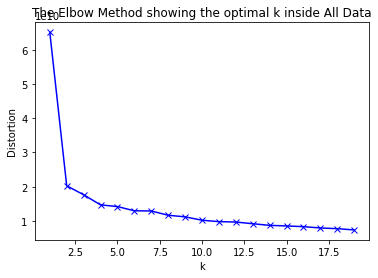

In [31]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_11_1.values)
    kmeanModel.fit(df_11_1.values)
    distortions.append(sum(np.min(cdist(df_11_1.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_11_1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k inside All Data')
plt.show()

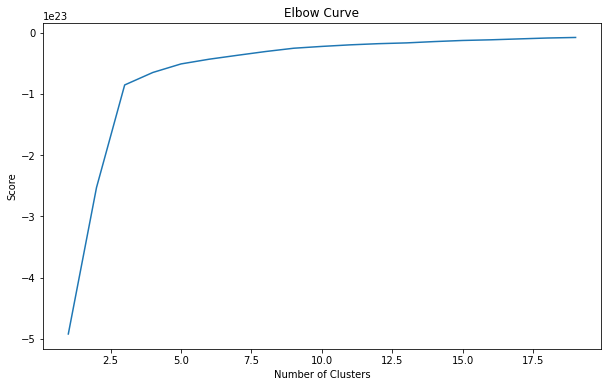

In [14]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [46]:
df_11.shape

(45270, 138)

In [ ]:
df_11

# Scaled K-Means

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [60]:
df_data_scaled = df_11[df_11["Anomaly"] == -1].iloc[:,1:-2]

In [102]:
df_data_scaled.shape

(149, 135)

In [63]:
data_scaled = scaler.fit_transform(df_data_scaled)

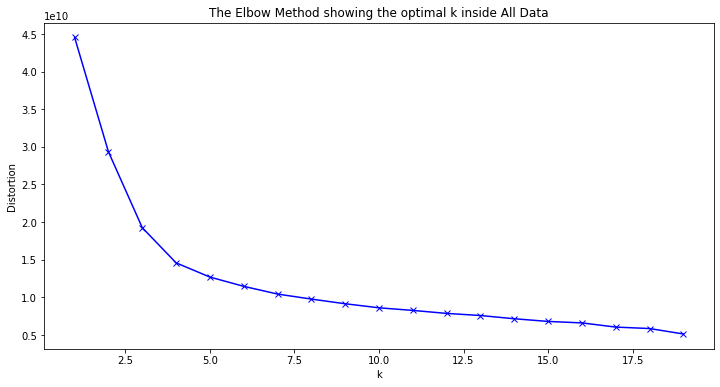

In [70]:
# k means determine k
distortions_1 = []
K = range(1,20)
for k in K:
    kmeanModel_1 = KMeans(n_clusters=k)#.fit(df_11_1.values)
    kmeanModel_1.fit(data_scaled)
    distortions_1.append(sum(np.min(cdist(df_data_scaled, kmeanModel_1.cluster_centers_, 'euclidean'), axis=1)) / df_data_scaled.shape[0])

# Plot the elbow
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k inside All Data')
plt.show()

Text(0, 0.5, 'Inertia')

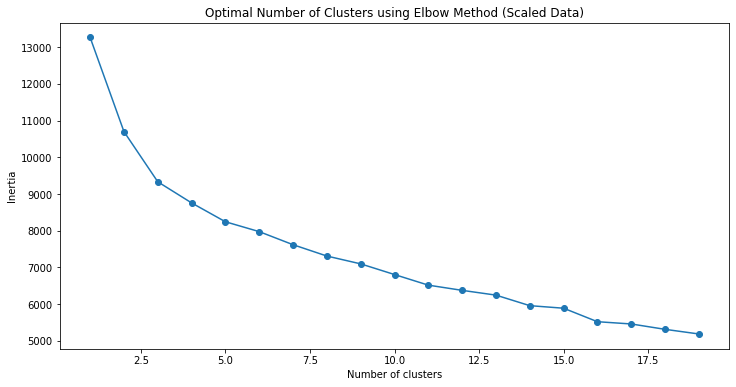

In [73]:
sse = []
k_list = range(1, 20)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(data_scaled)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,20), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [77]:
# See how many cluster we can get in all data

df_11.shape

(45270, 138)

In [78]:
all_df = df_11.iloc[:,1:-2]

In [83]:
scale_all = StandardScaler()
all_df_scaled = scale_all.fit_transform(all_df)

In [86]:
all_df_scaled.shape

(45270, 135)

Text(0, 0.5, 'Inertia')

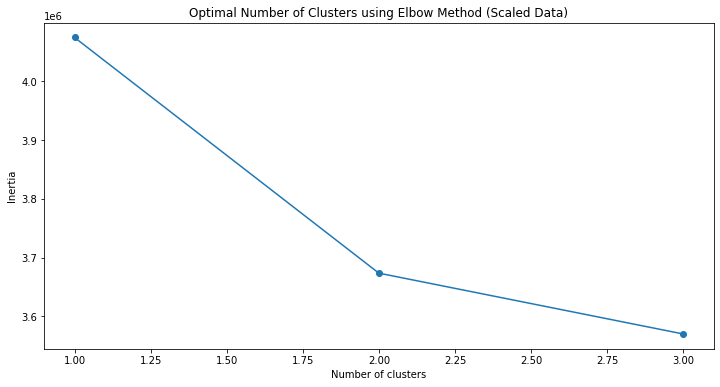

In [90]:
sse = []
k_list = range(1, 4)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(all_df_scaled)
    sse.append([k, km.inertia_])
    
# oca_results_scale = pd.DataFrame({'Cluster': range(1,20), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# More Experiment using PCA and t-SNE

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [91]:
df_data_scaled.shape

(149, 135)

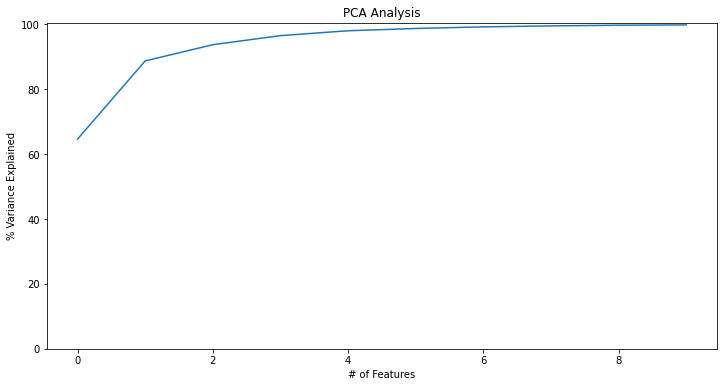

In [94]:
pca = PCA(n_components=10)
pca.fit(df_data_scaled)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [99]:
print(var)

[64.6 88.7 93.7 96.5 98.  98.7 99.2 99.5 99.7 99.8]


- Here we can see we are able to explain the variance in our data by almost 96%  with 4 features
- In our original data, we have seen our features are of
    - SQL 
    - Traffic
    - Processor
    - Memory

In [92]:
pca = PCA(n_components=4)
pca.fit(df_data_scaled)
pca_scale = pca.transform(df_data_scaled)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3', 'pc4'])
print(pca.explained_variance_ratio_)

[0.64567256 0.24138688 0.05030002 0.02777626]


In [101]:
variance[:4]

array([0.64567256, 0.24138688, 0.05030002, 0.02777626])

## K-Mean on Original Data
- Scaled one

In [105]:
df_data_scaled.shape

(149, 135)

In [106]:
data_scaled.shape

(149, 135)

Text(0, 0.5, 'Inertia')

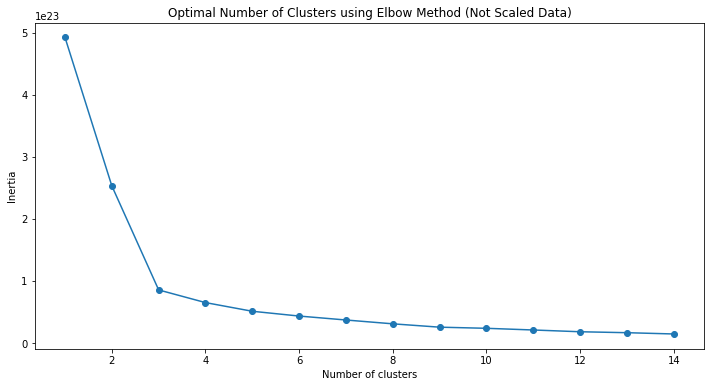

In [110]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_data_scaled)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Not Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

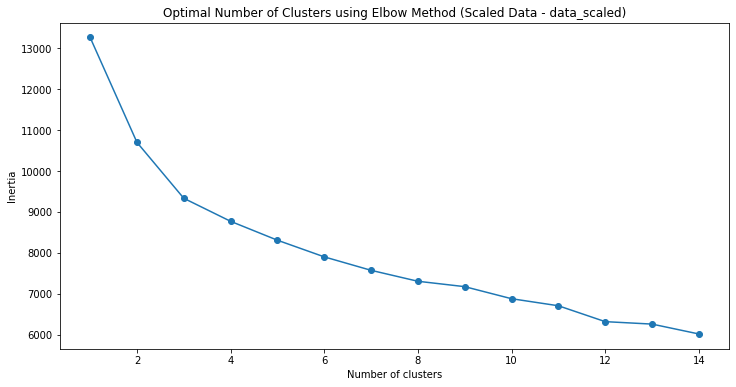

In [108]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(data_scaled)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data - data_scaled)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [112]:
df_scale = pd.DataFrame(data = data_scaled, columns = df_data_scaled.columns)

In [113]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.26940949005595205


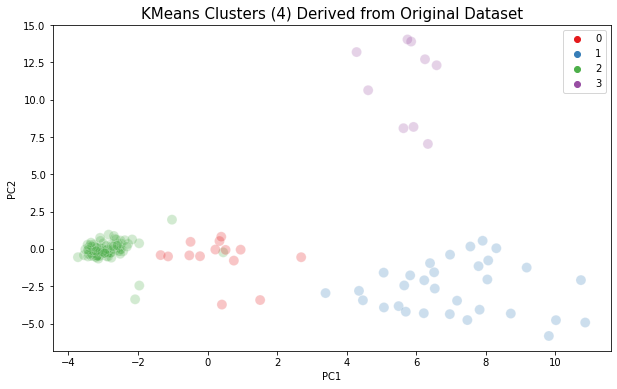

In [121]:
# PCA on df_scale2

pca2 = PCA(n_components=4).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,6))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.25).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [123]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [125]:
# PCA on data

pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.21164466 0.11607314 0.05688017]


In [126]:
# Applying K-Means on PCA done data

Text(0, 0.5, 'Inertia')

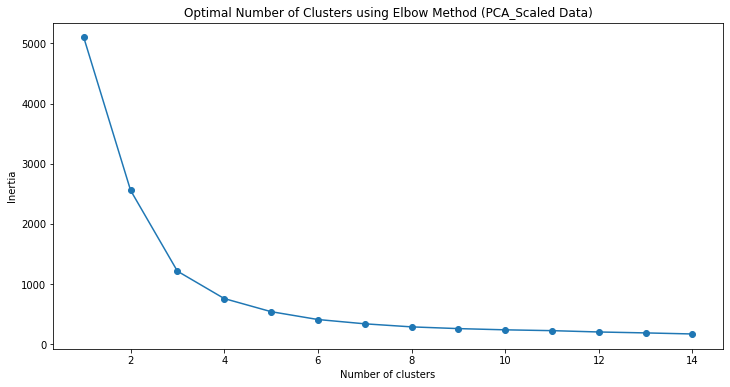

In [127]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [128]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=43).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.7212974439999184


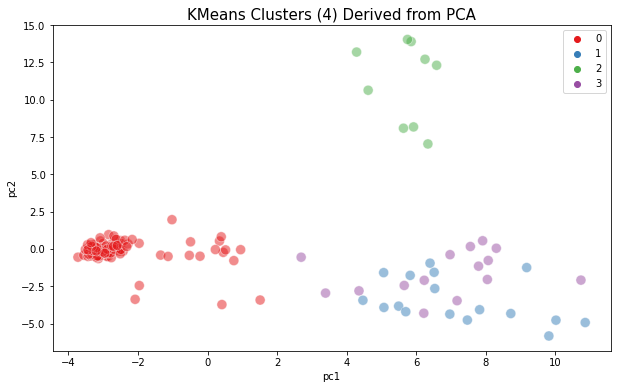

In [130]:
plt.figure(figsize = (10,6))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.5).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

# t-SNE

[t-SNE] Computing 148 nearest neighbors...
[t-SNE] Indexed 149 samples in 0.001s...
[t-SNE] Computed neighbors for 149 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 4.713786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 126.692322
[t-SNE] KL divergence after 500 iterations: 1.426073


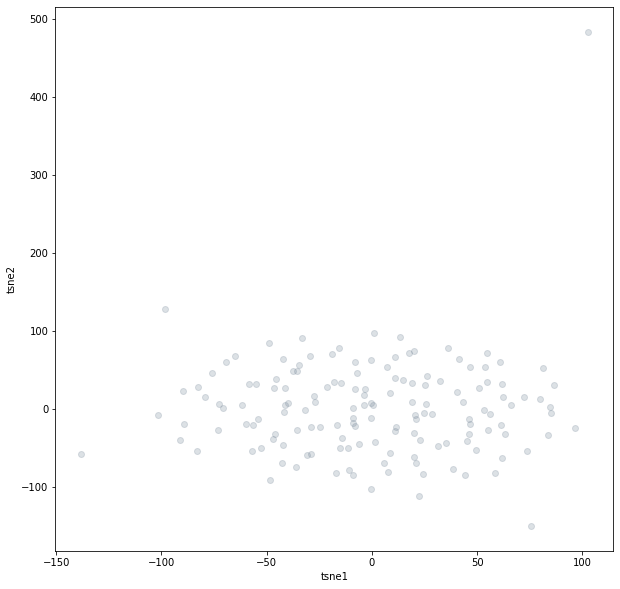

In [133]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

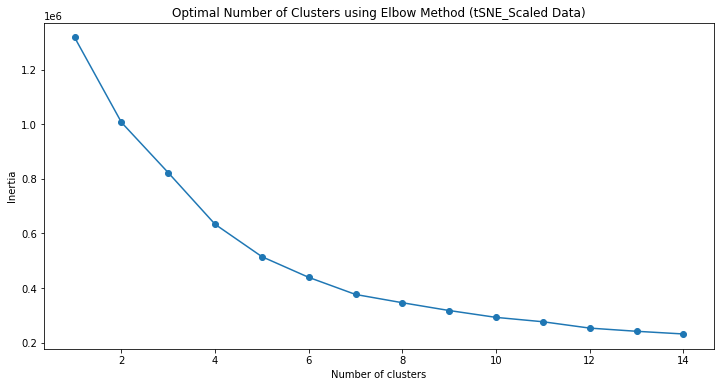

In [134]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [135]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=44).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.2245555818080902


# Analysis Cluster - Feature wise

In [153]:
# df_data_scaled.reset_index(inplace=True)
df_data_scaled.index

RangeIndex(start=0, stop=149, step=1)

In [151]:
clusters_pca_scale.index

RangeIndex(start=0, stop=149, step=1)

In [157]:
cluster_pca_profile = pd.merge(df_data_scaled, clusters_pca_scale['pca_clusters'], left_index=True, right_index=True )

In [142]:
clusters_pca_scale['pca_clusters'].value_counts()

0    108
1     17
3     15
2      9
Name: pca_clusters, dtype: int64

In [159]:
cluster_pca_profile.head()

index  Total disk space on K:  Total disk space on J:  \
0    256            8.589902e+11            9.663355e+10   
1    462            8.938692e+11            9.663355e+10   
2    466            8.938692e+11            9.663355e+10   
3    467            8.938692e+11            9.663355e+10   
4    473            8.589902e+11            9.663355e+10   

   Total disk space on N:\LOGS  Total disk space on N:  \
0                 5.365498e+09            2.899071e+11   
1                 5.365498e+09            2.899071e+11   
2                 5.365498e+09            2.899071e+11   
3                 5.365498e+09            2.899071e+11   
4                 5.365498e+09            2.899071e+11   

   SQL Server, Locks: Lock Waits per second (Total)  \
0                                            0.0000   
1                                            0.0000   
2                                           11.8159   
3                                            0.9846   
4                                            4.9230   

   SQL Server, Buffer Manager: Page reads/sec  \
0                                    382.9560   
1                                      6.8923   
2                                   2960.8238   
3                                   1237.6258   
4                                    756.2978   

   Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
0                                         49621736.0                                                   
1                                         49699136.0                                                   
2                                        253265592.0                                                   
3                                        574666432.0                                                   
4                                         27085336.0                                                   

   SQL Server, Locks: Number of Deadlocks/sec (Total)  Free disk space on V:  \
0                                                0.0            1.631375e+10   
1                                                0.0            1.571396e+10   
2                                                0.0            1.571081e+10   
3                                                0.0            1.571081e+10   
4                                                0.0            1.570977e+10   

   ...  SQL Server, Locks: Average Wait Time (Total)  \
0  ...                                           0.0   
1  ...                                           0.0   
2  ...                                           0.0   
3  ...                                          46.5   
4  ...                                         359.4   

   Free disk space on R:\LOGS  Free disk space on G:  \
0                5.037883e+09           4.036710e+10   
1                5.037883e+09           4.036710e+10   
2                5.037883e+09           4.036710e+10   
3                5.037883e+09           4.036710e+10   
4                5.037883e+09           4.036710e+10   

   Free disk space on N:\LOGS  Free disk space on H:\LOGS  \
0                3.435790e+09                4.689887e+09   
1                3.435790e+09                4.689887e+09   
2                3.435790e+09                4.689887e+09   
3                3.435790e+09                4.689887e+09   
4                3.435790e+09                4.689887e+09   

   Free disk space on Q:  SQL Server, Memory Manager: Memory Grants Pending  \
0           3.079995e+10                                                0.0   
1           3.038052e+10                                                0.0   
2           3.038052e+10                                                0.0   
3           3.038052e+10                                                0.0   
4           3.038052e+10                                                0.0   

   Free disk space on S:  SQL Server, Cache: 

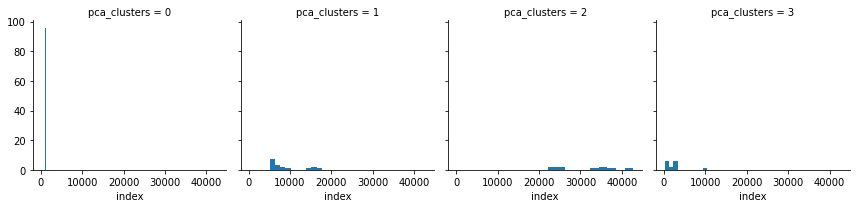

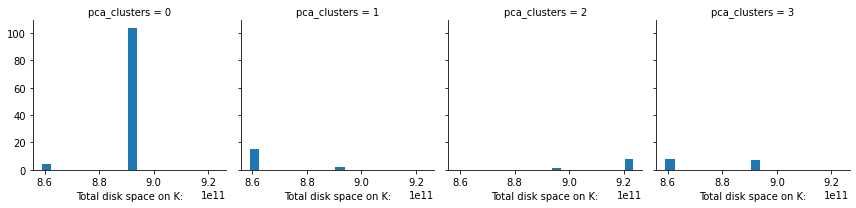

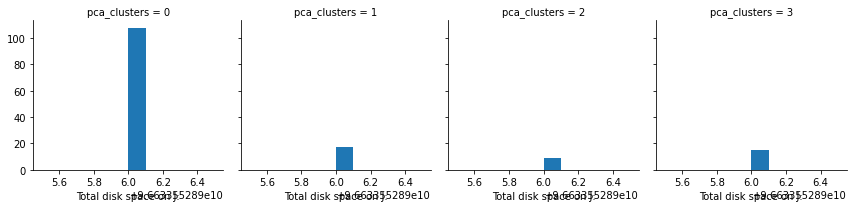

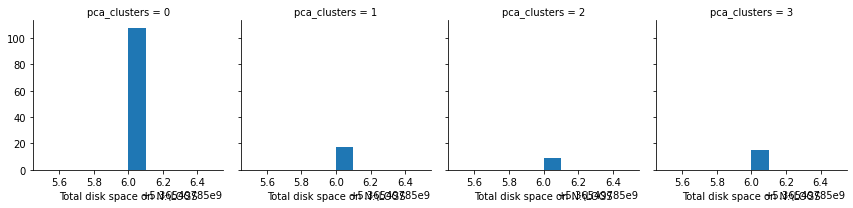

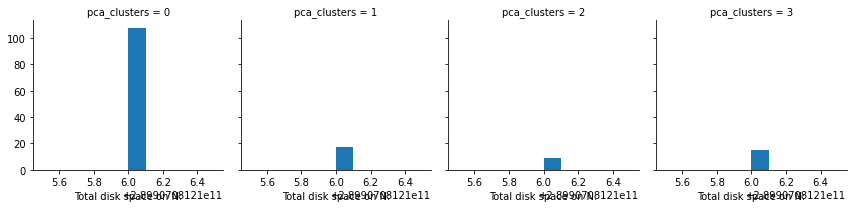

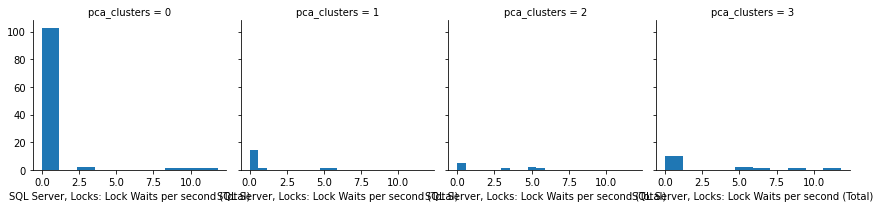

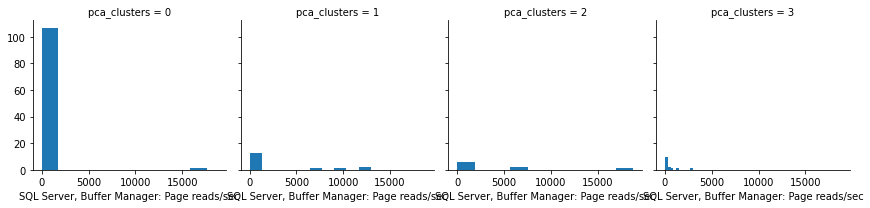

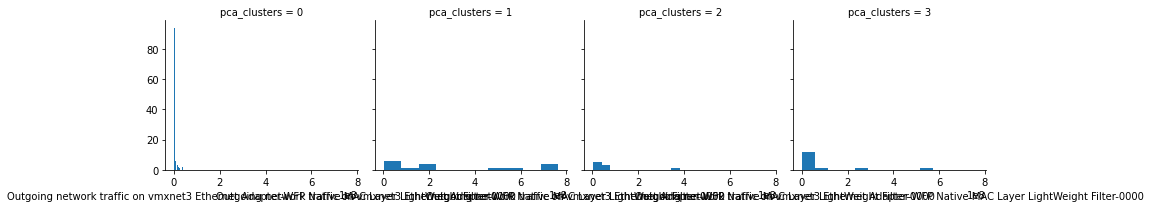

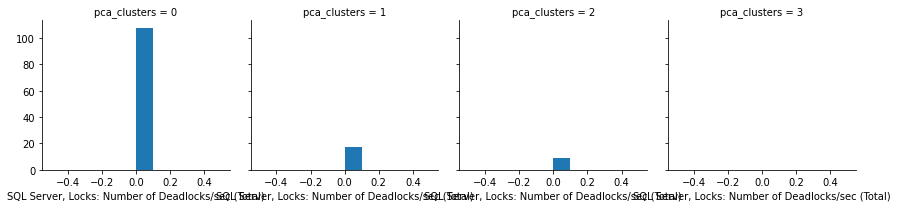

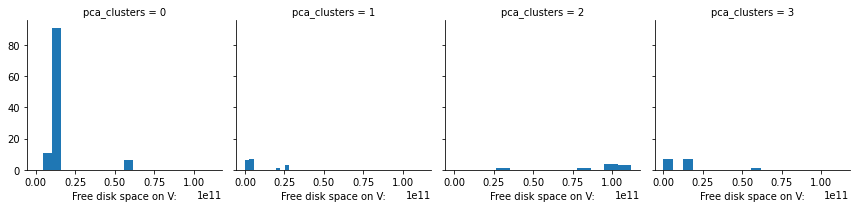

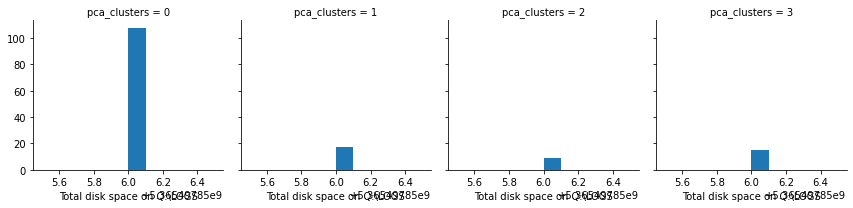

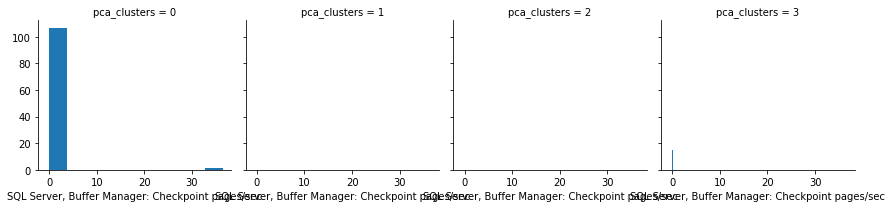

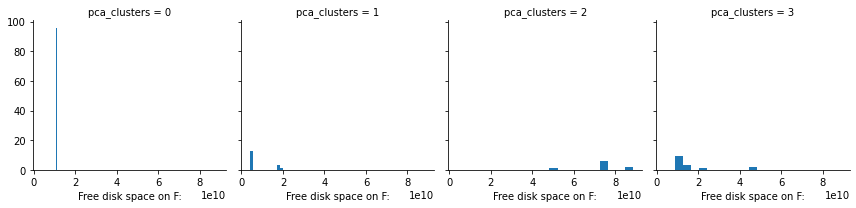

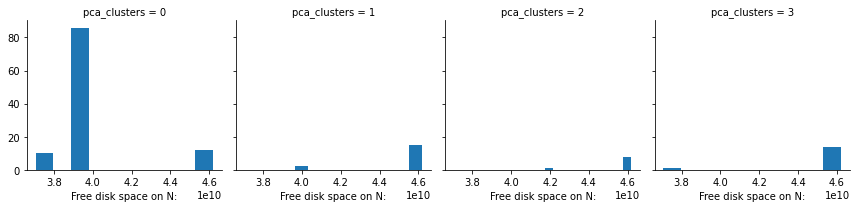

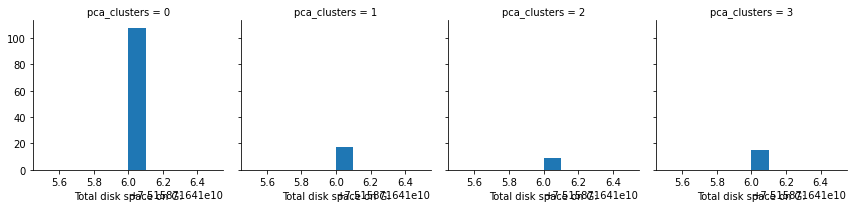

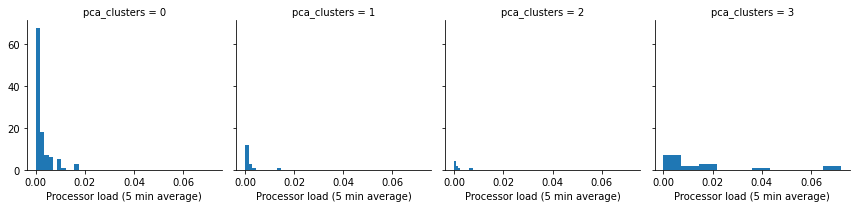

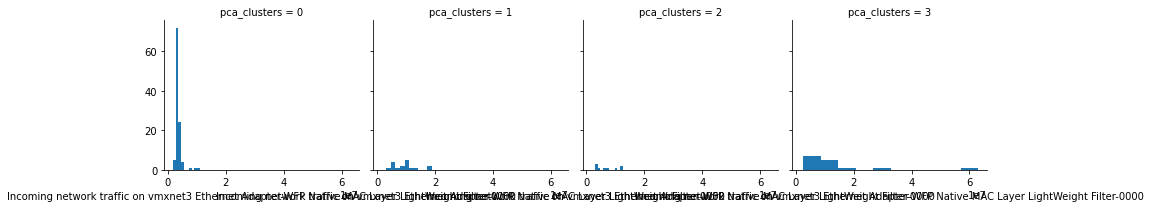

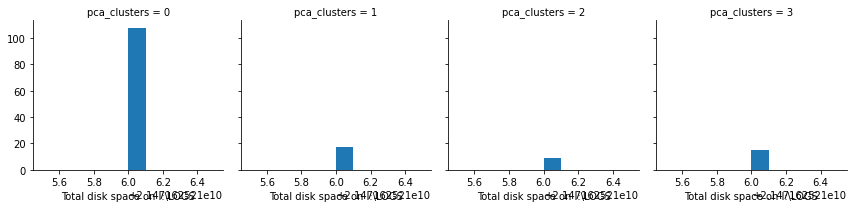

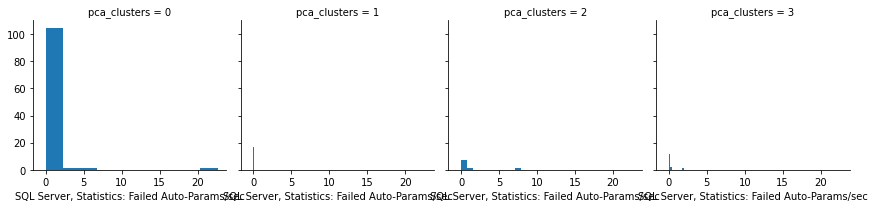

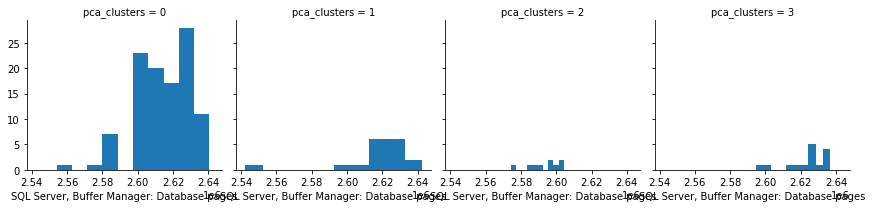

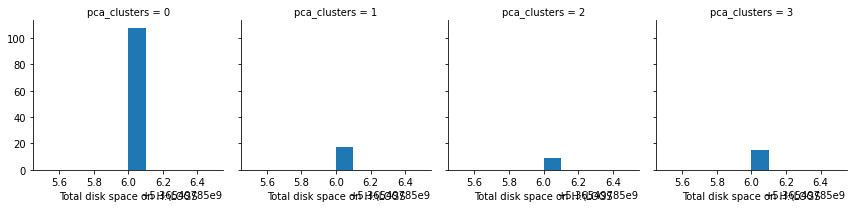

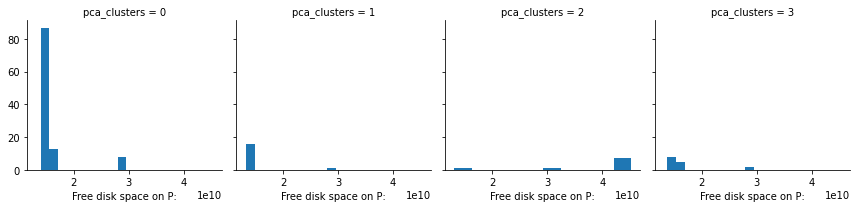

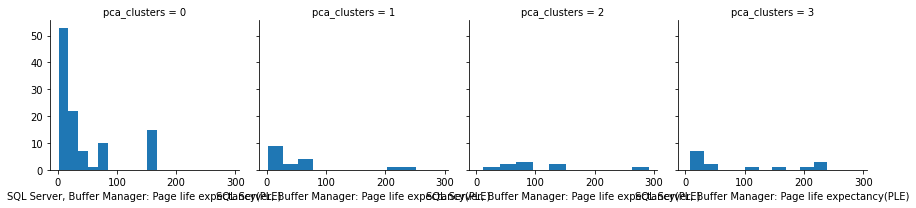

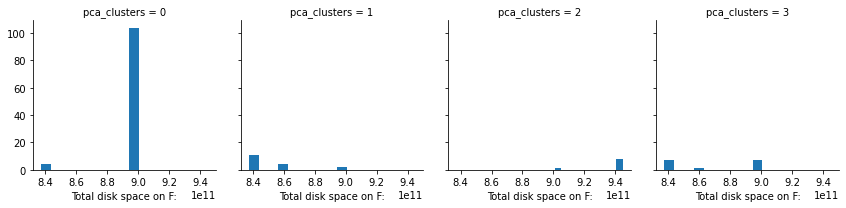

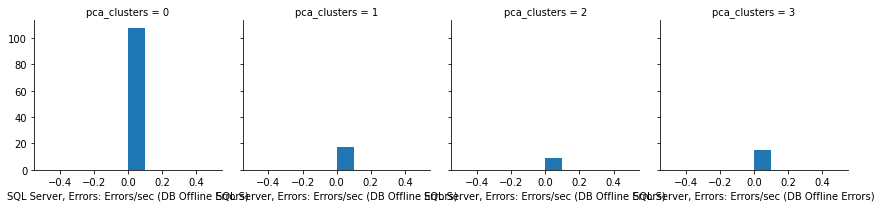

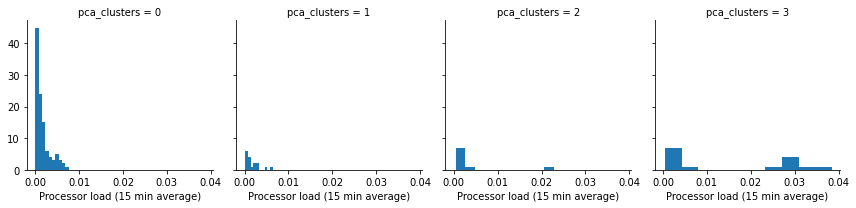

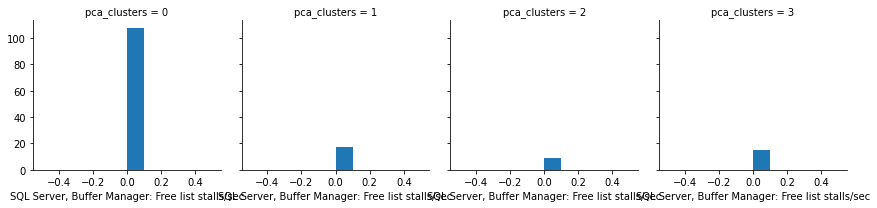

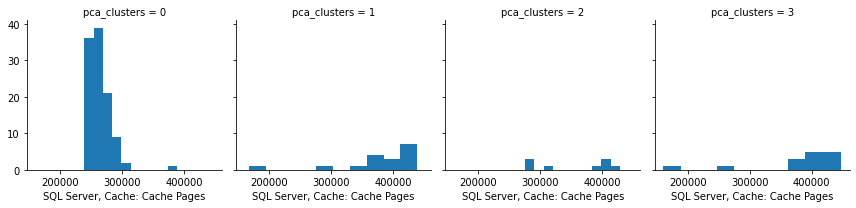

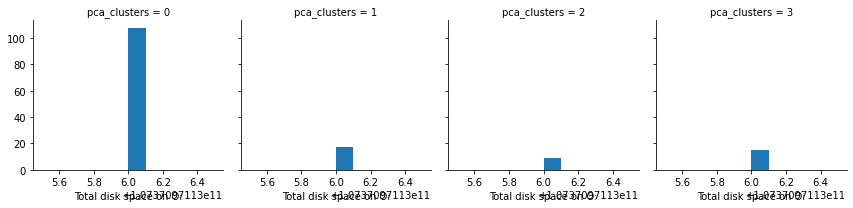

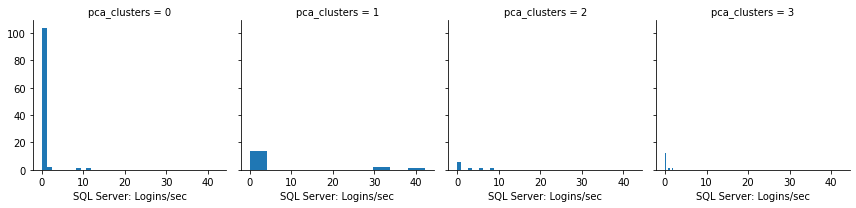

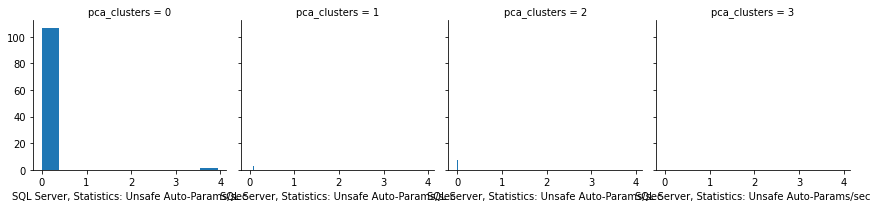

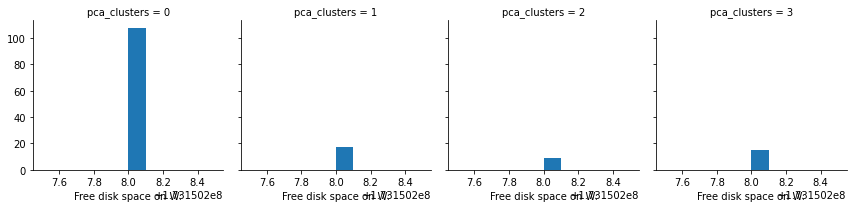

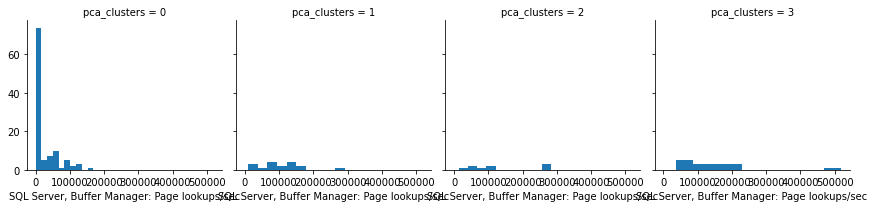

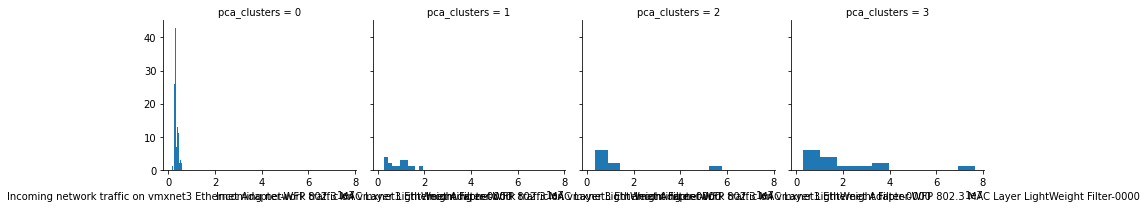

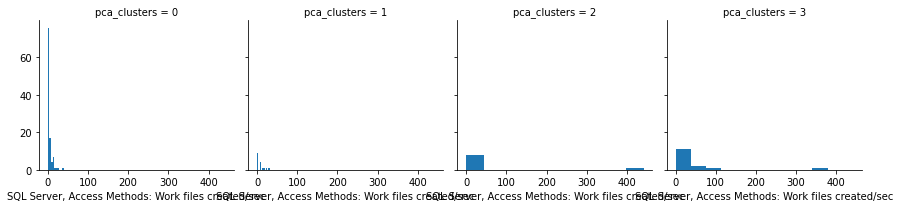

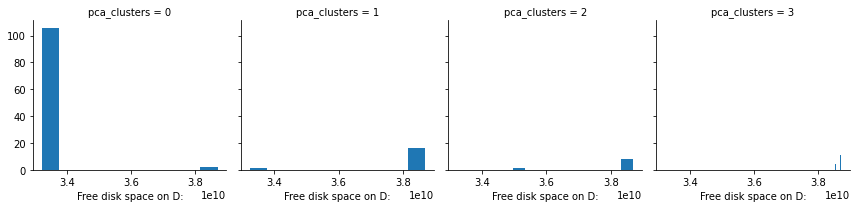

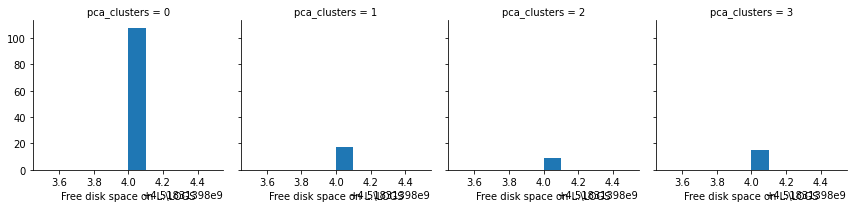

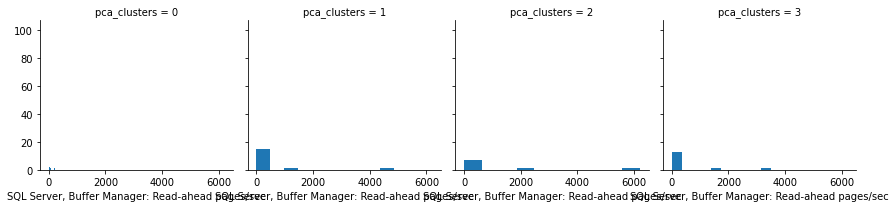

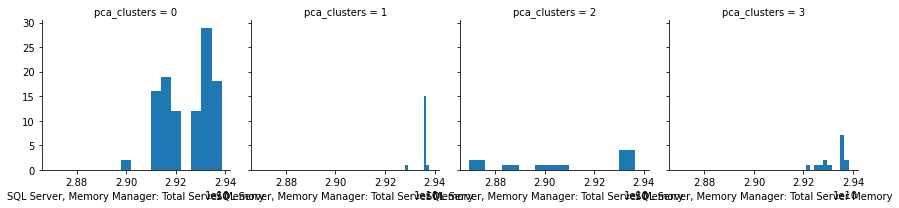

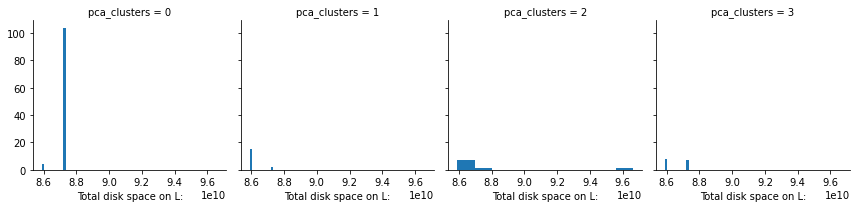

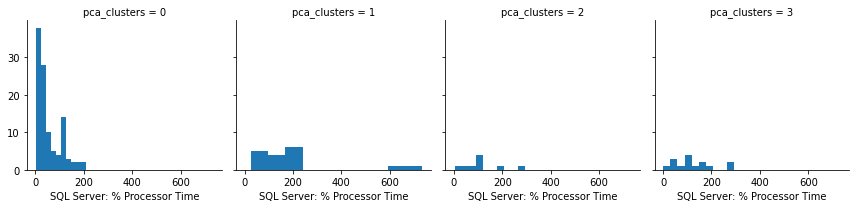

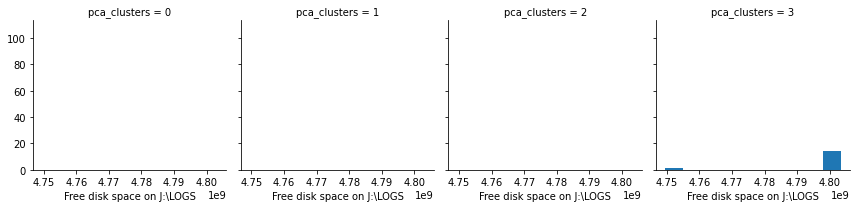

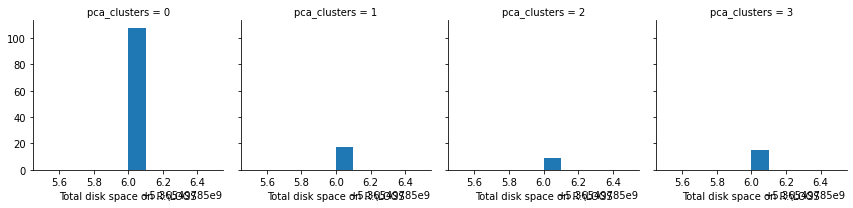

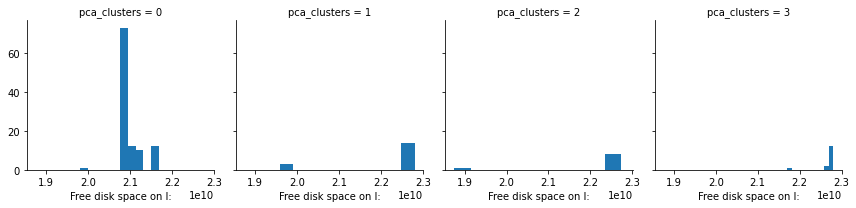

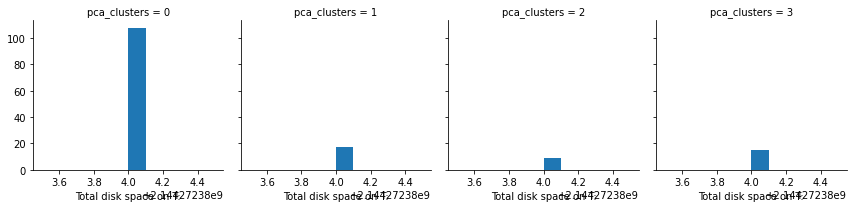

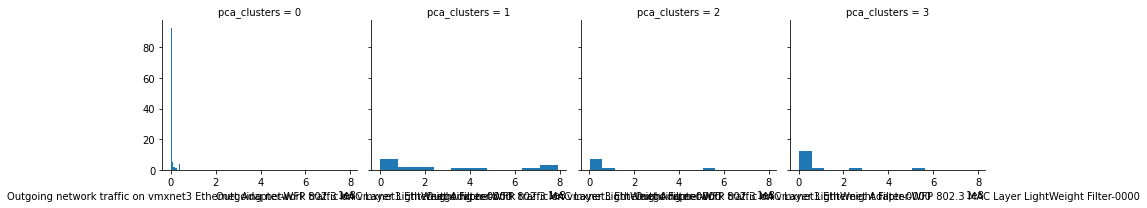

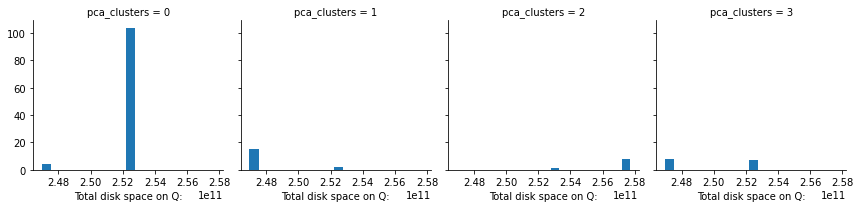

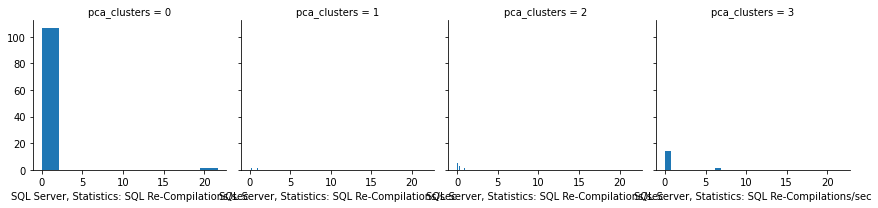

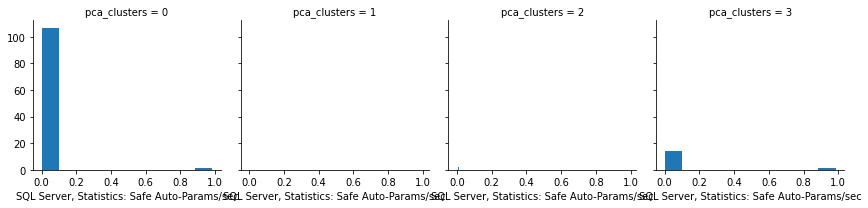

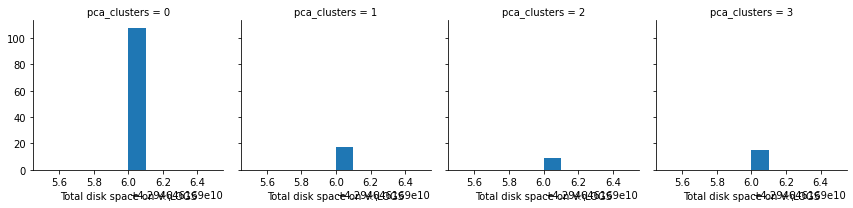

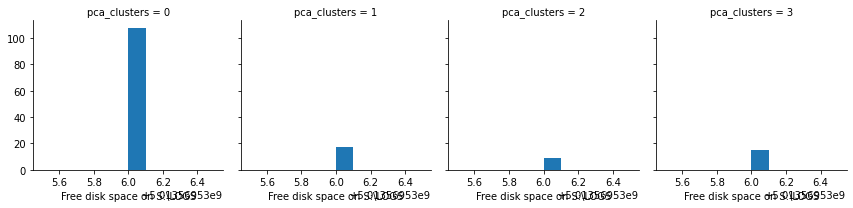

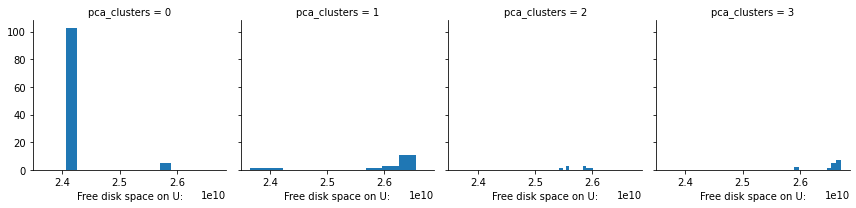

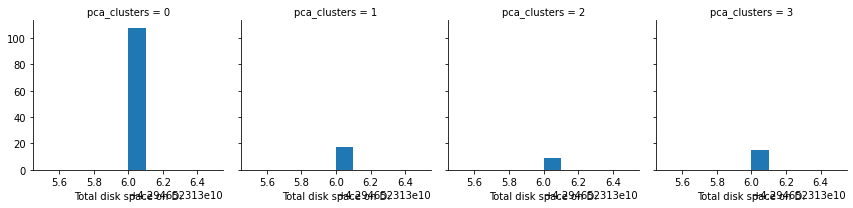

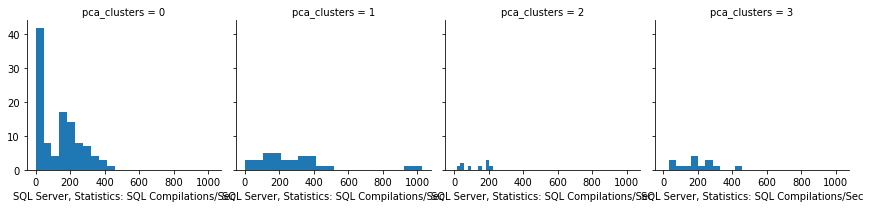

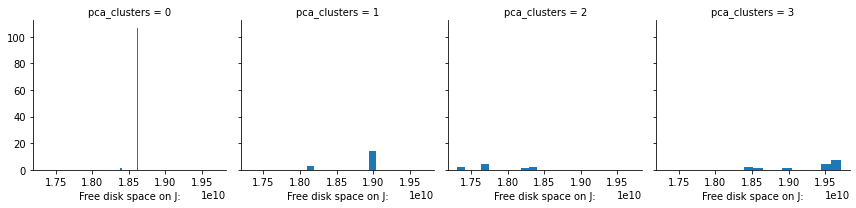

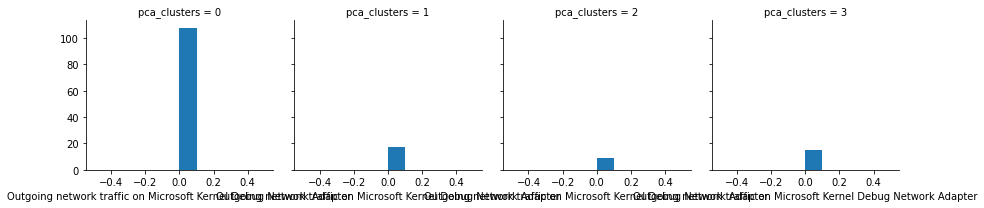

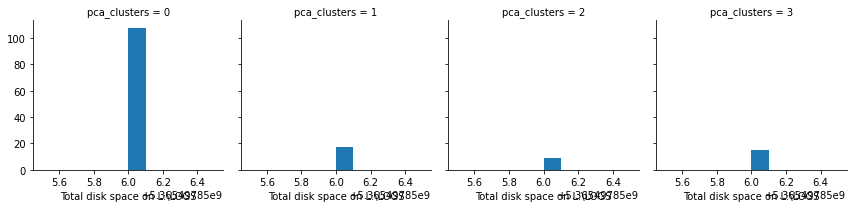

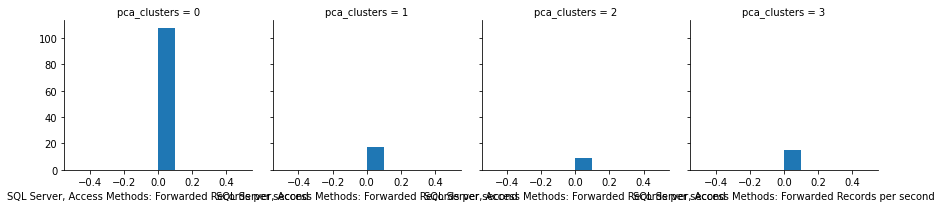

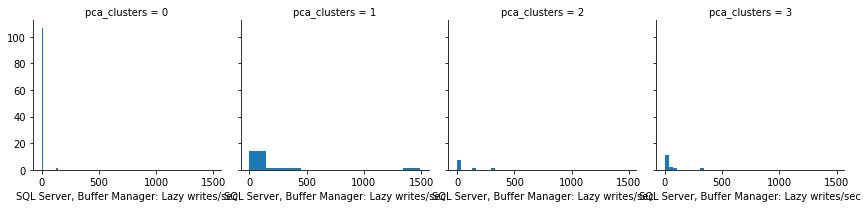

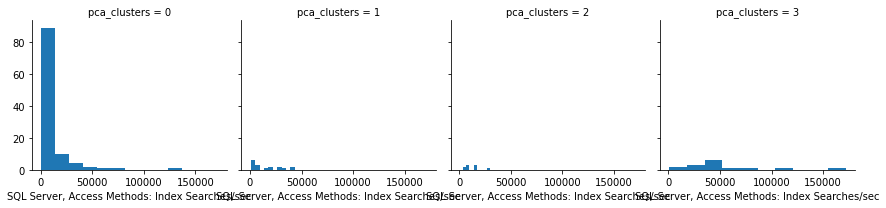

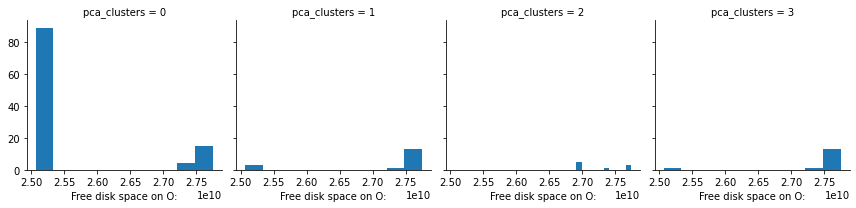

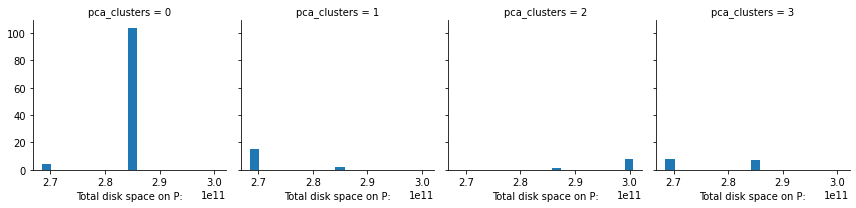

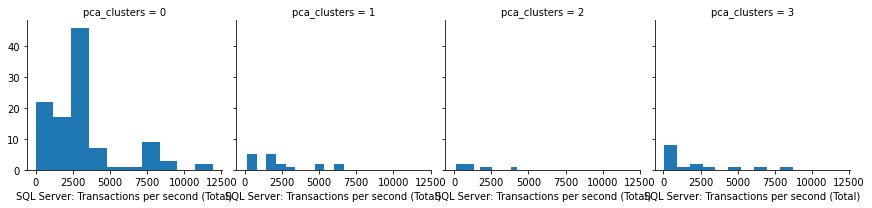

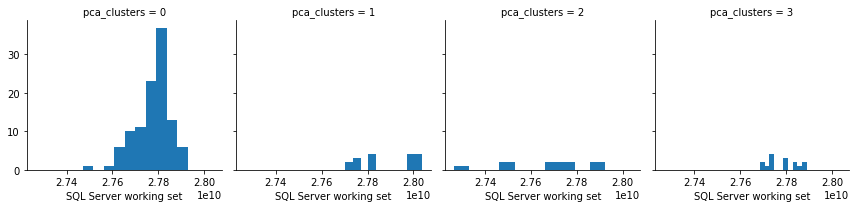

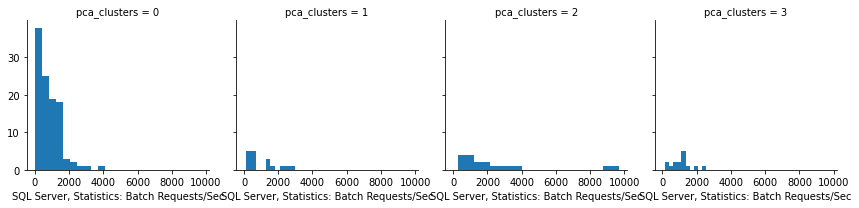

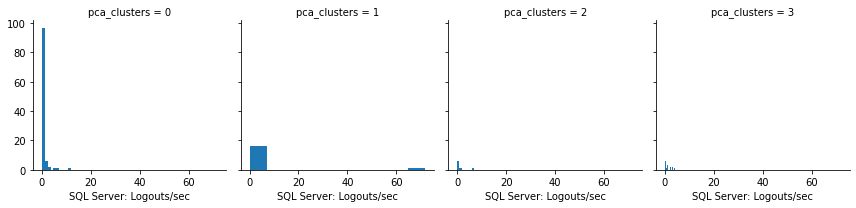

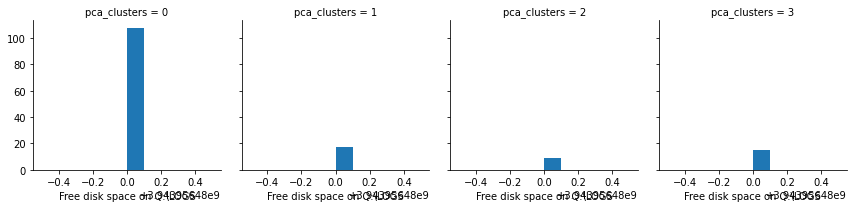

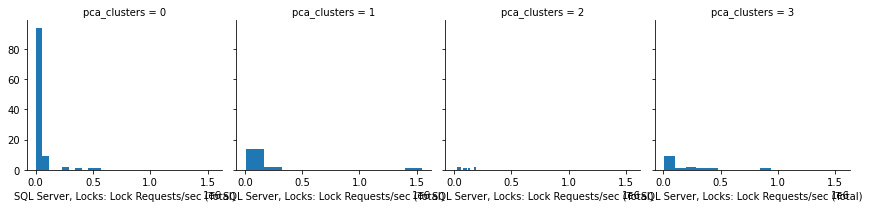

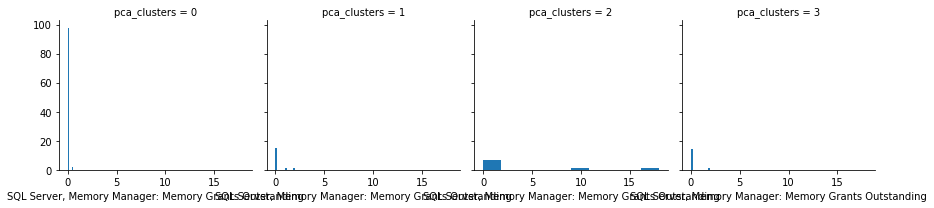

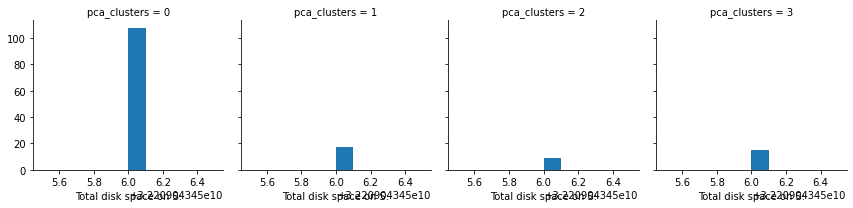

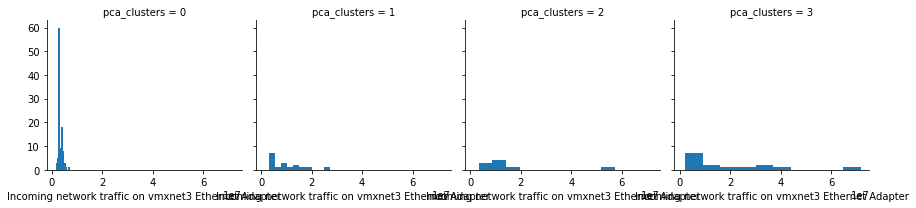

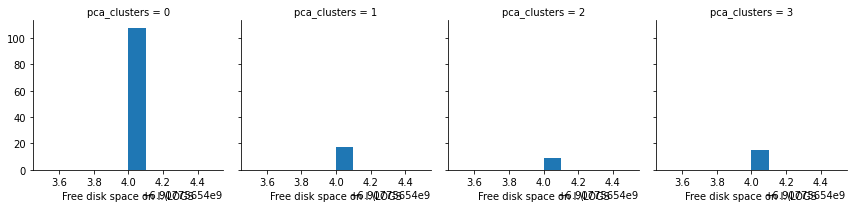

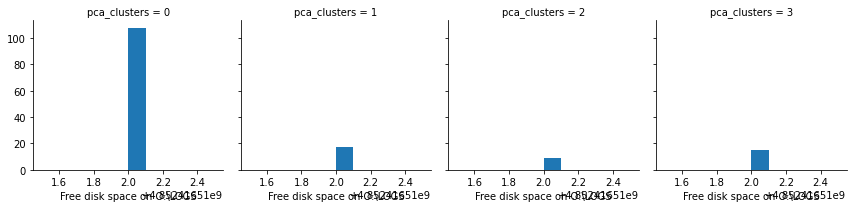

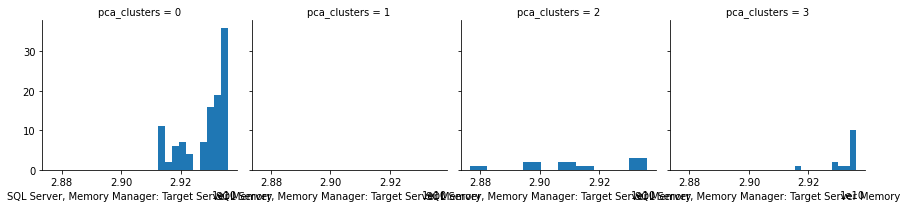

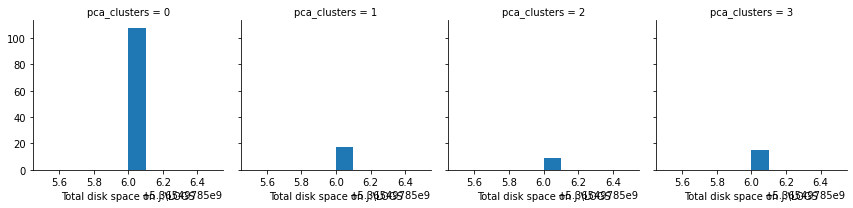

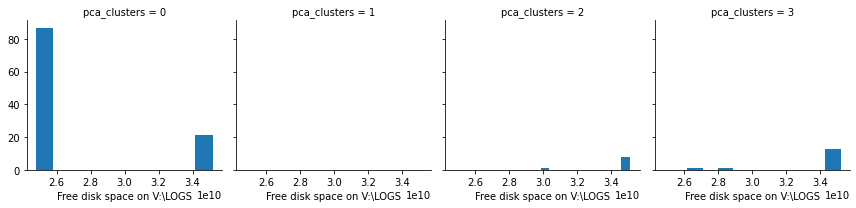

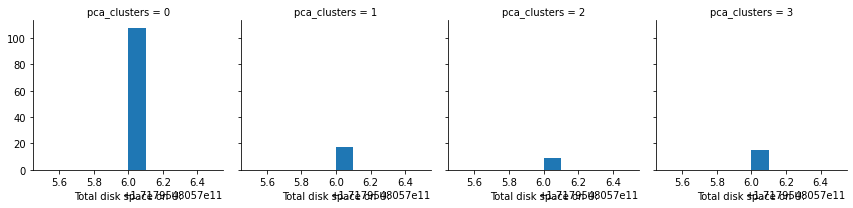

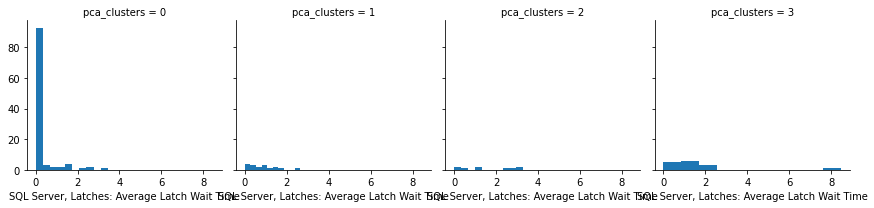

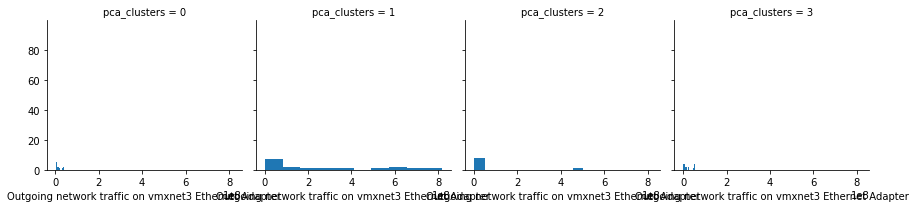

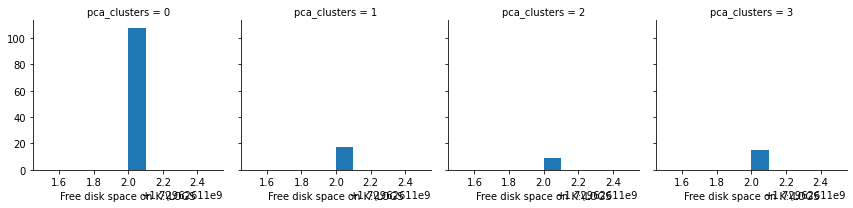

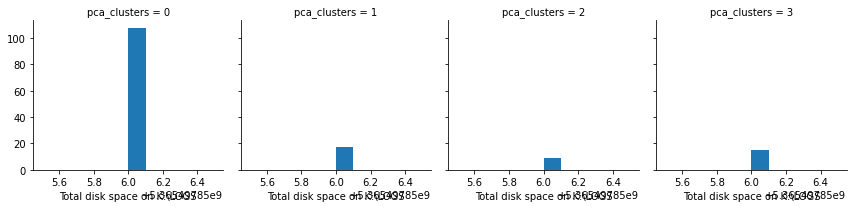

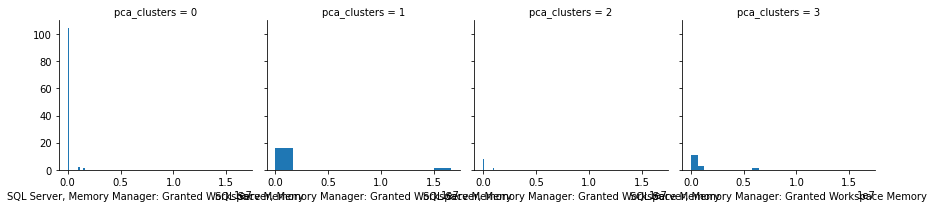

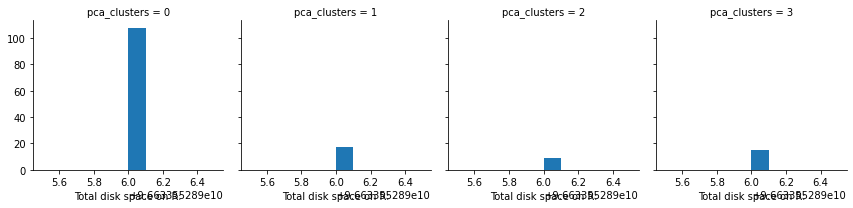

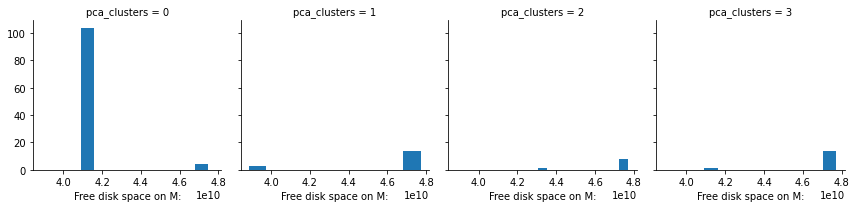

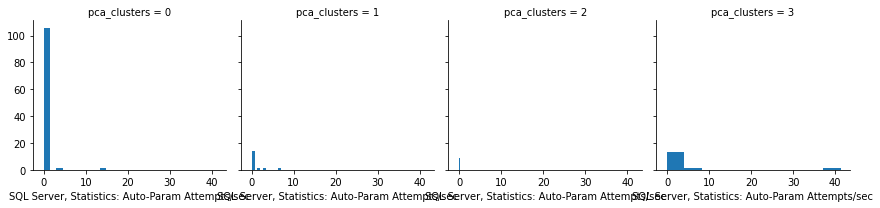

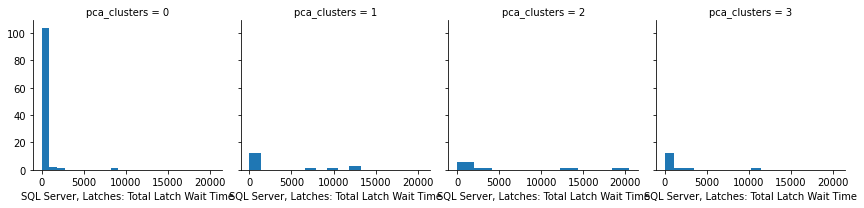

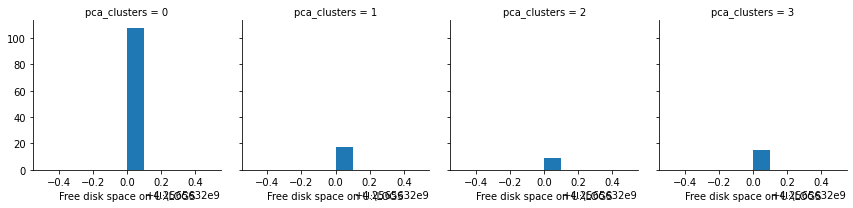

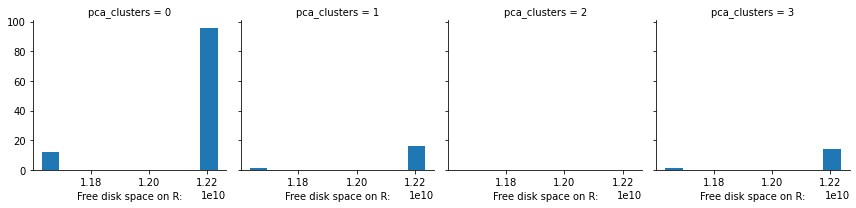

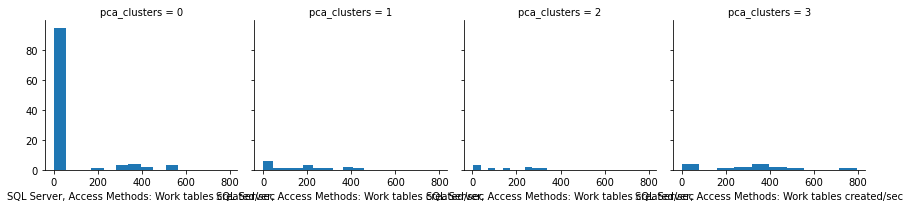

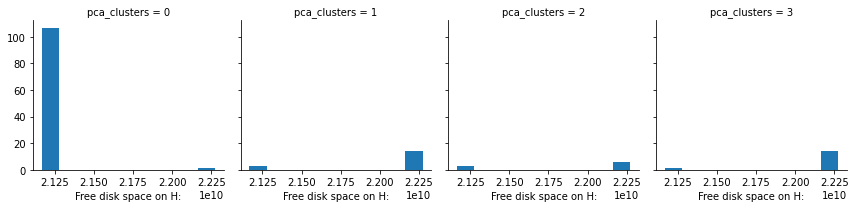

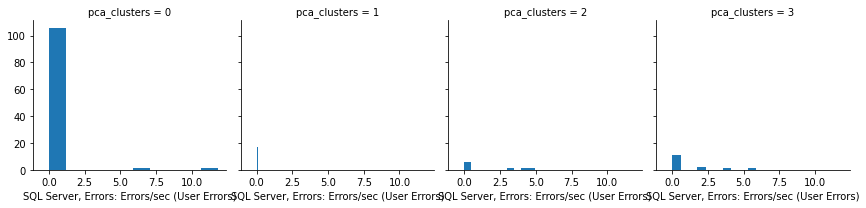

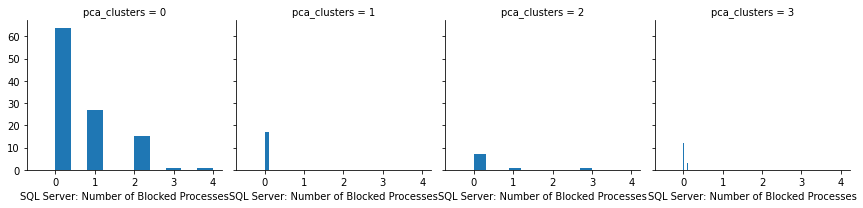

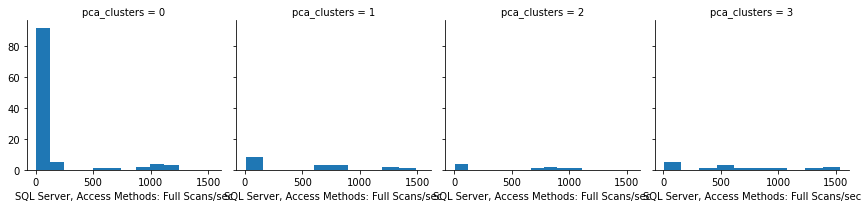

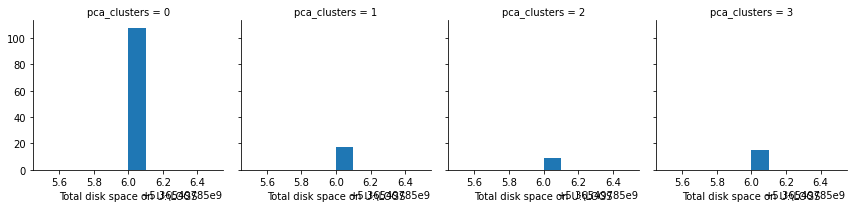

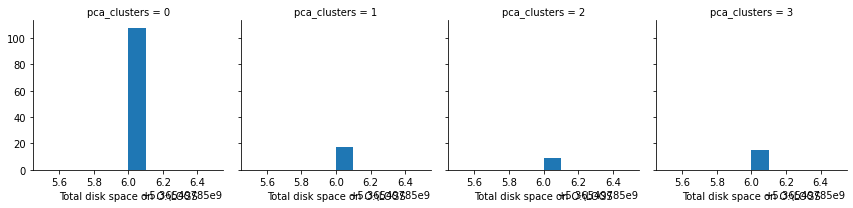

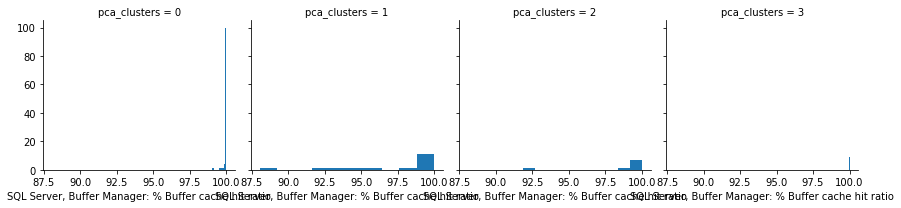

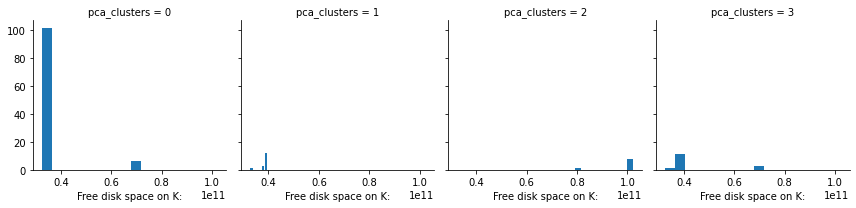

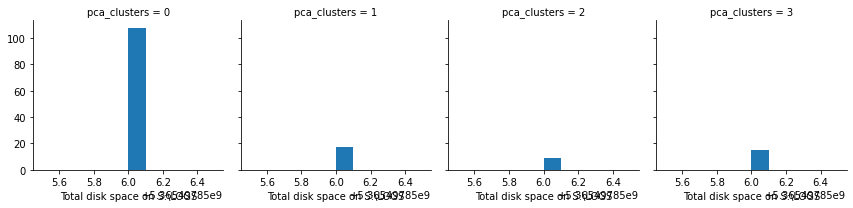

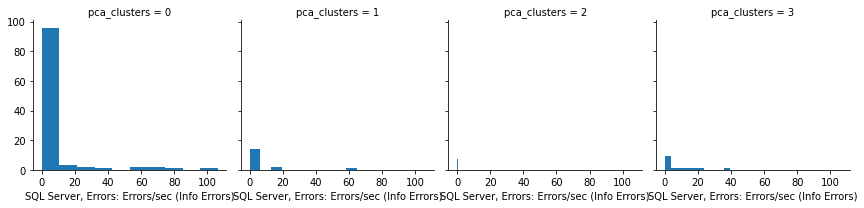

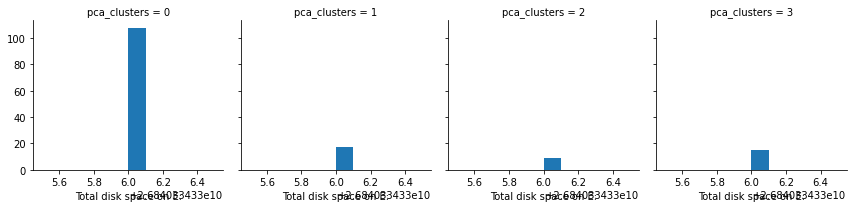

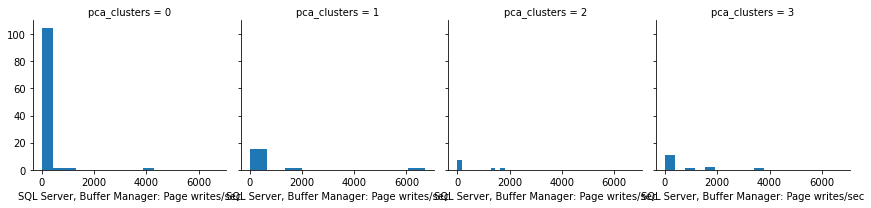

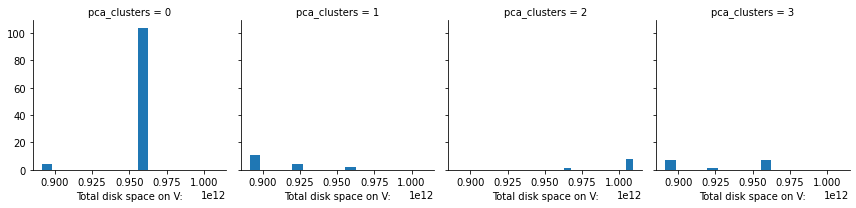

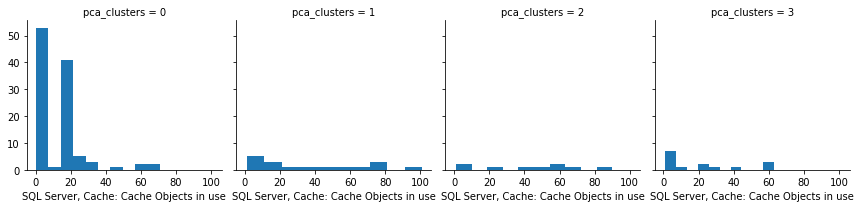

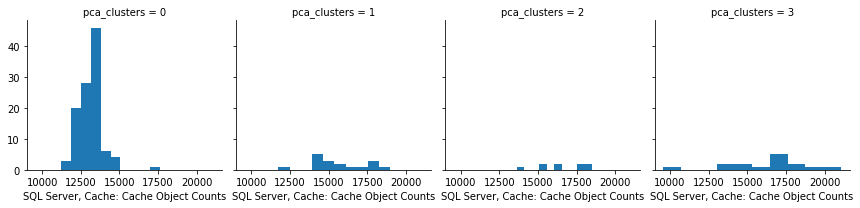

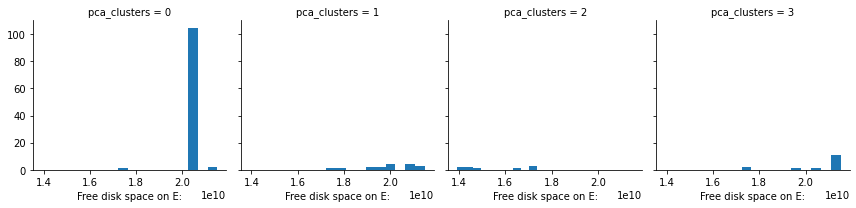

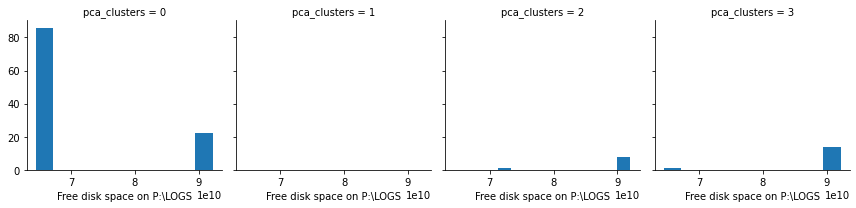

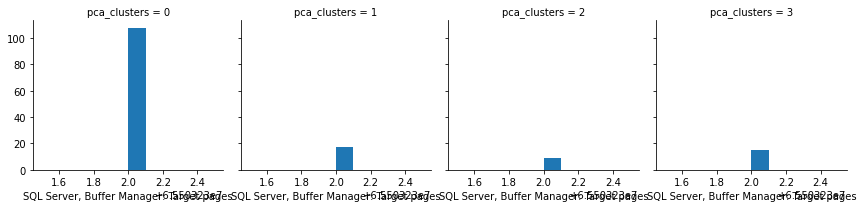

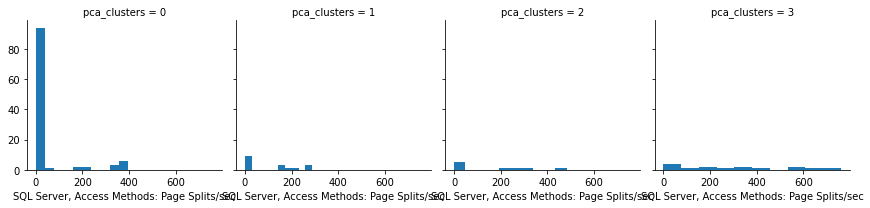

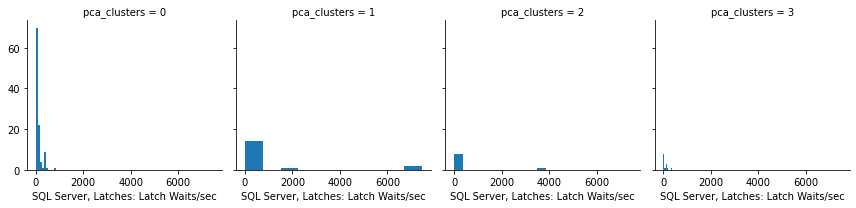

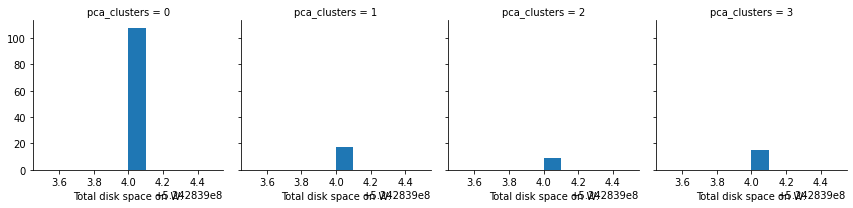

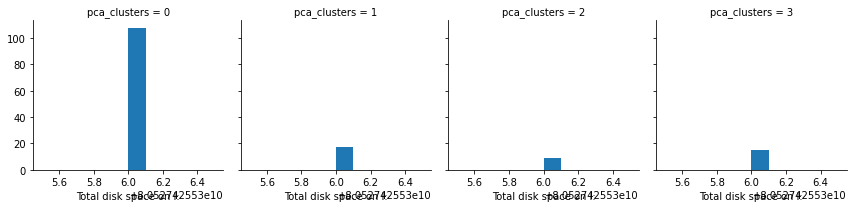

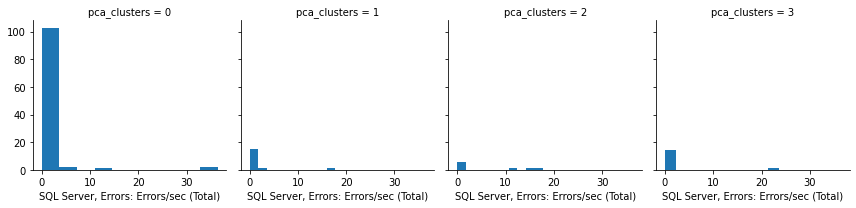

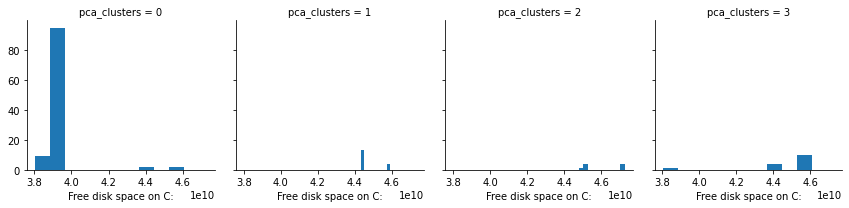

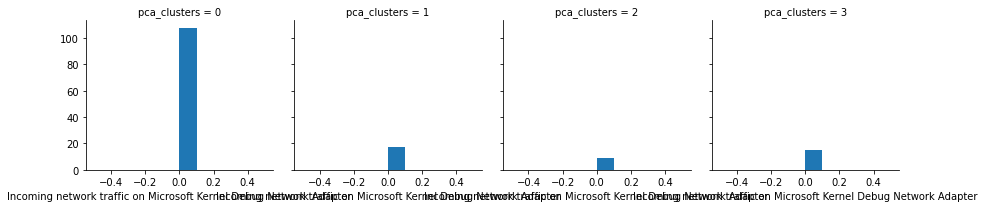

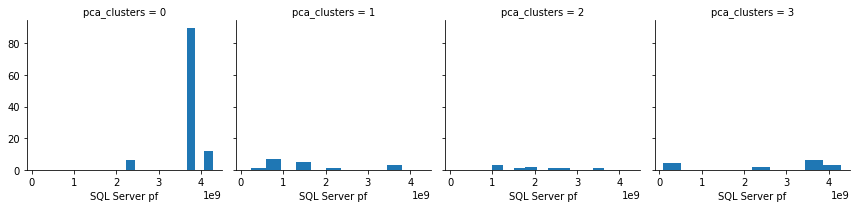

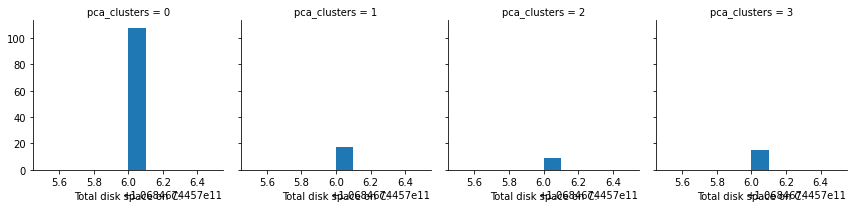

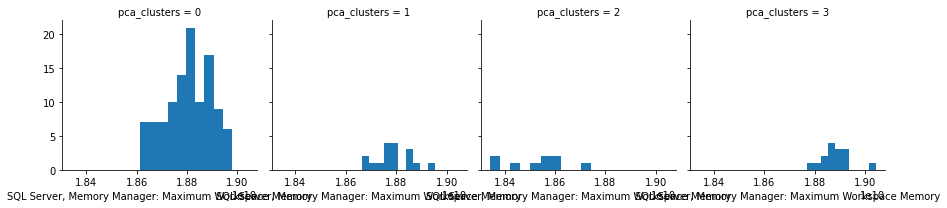

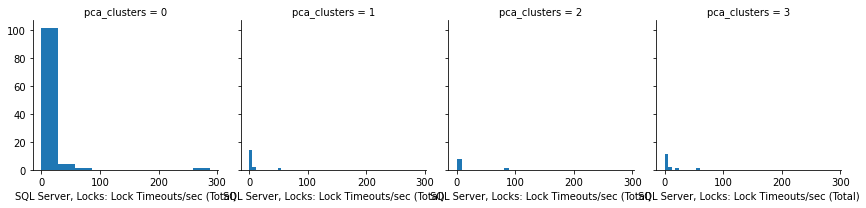

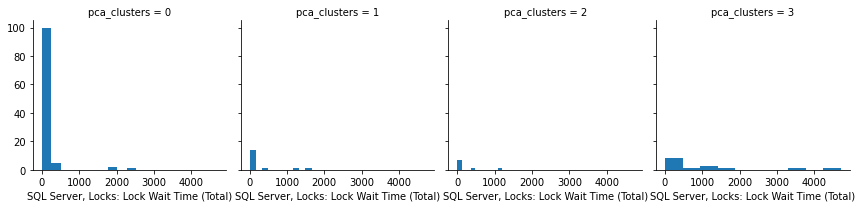

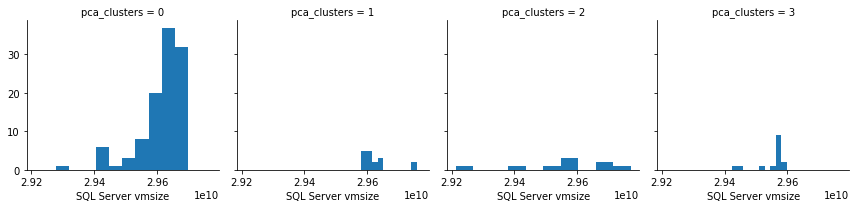

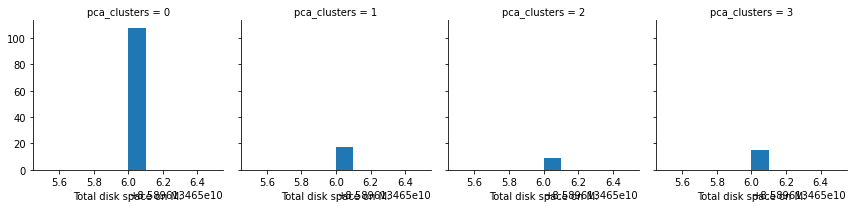

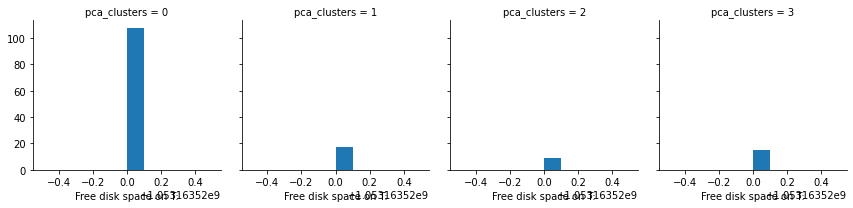

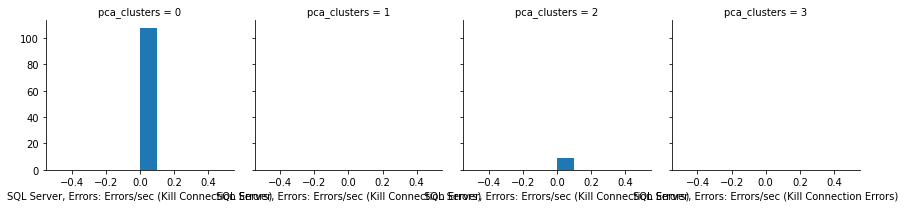

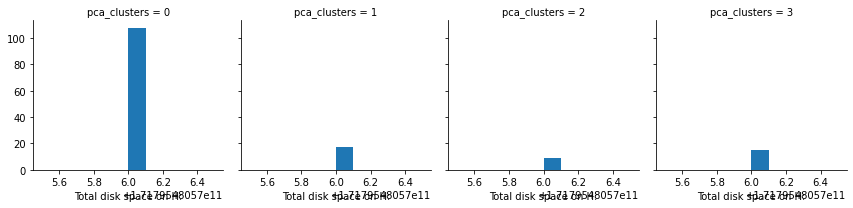

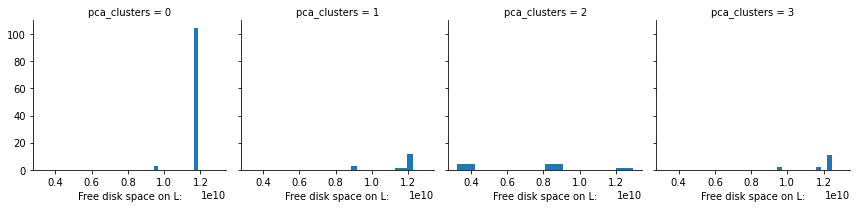

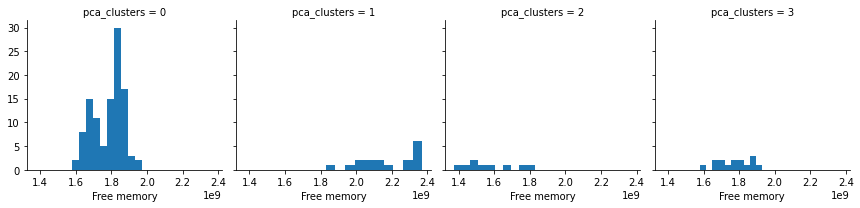

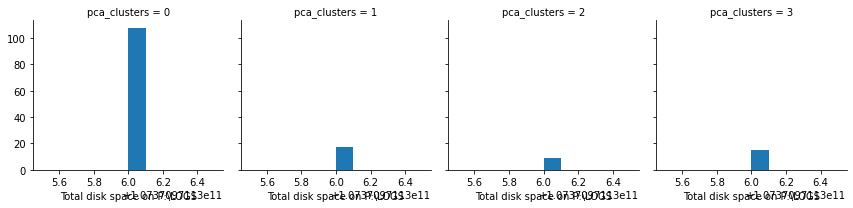

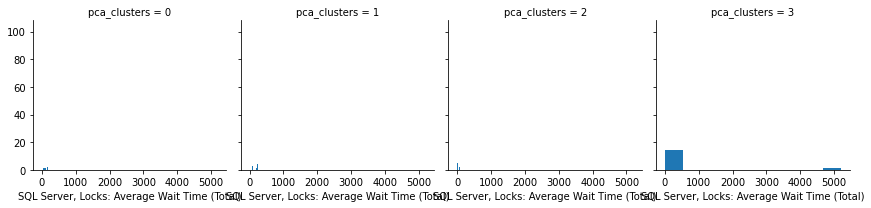

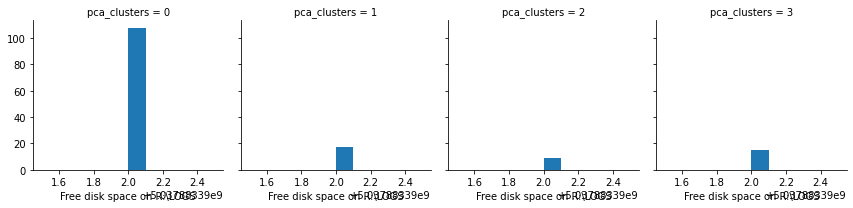

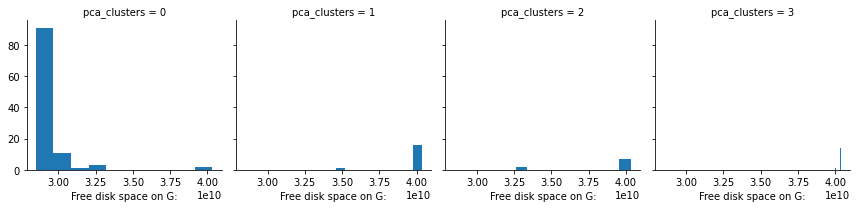

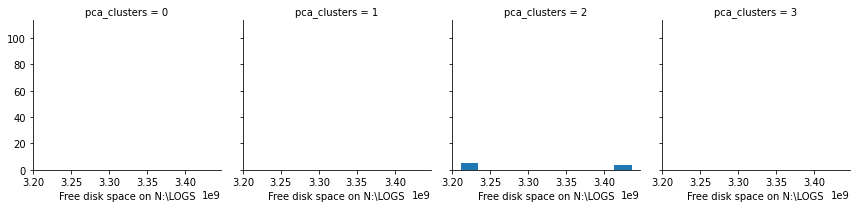

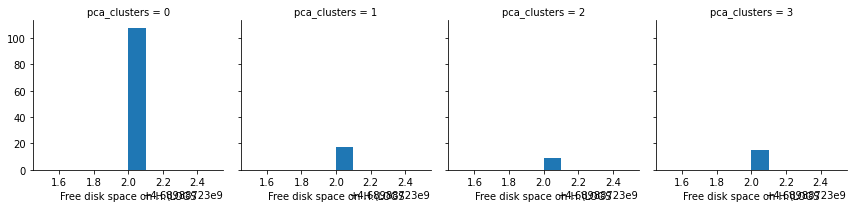

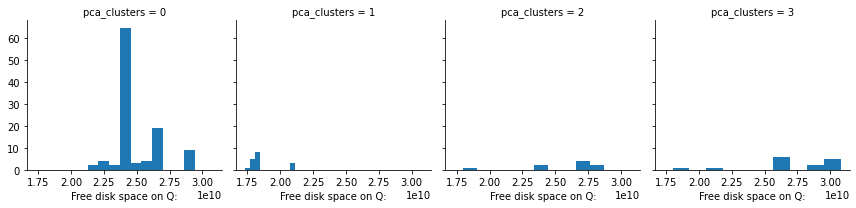

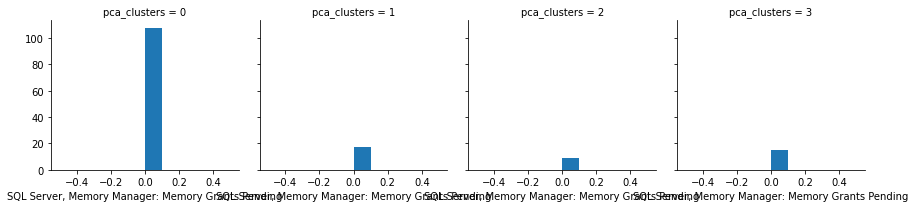

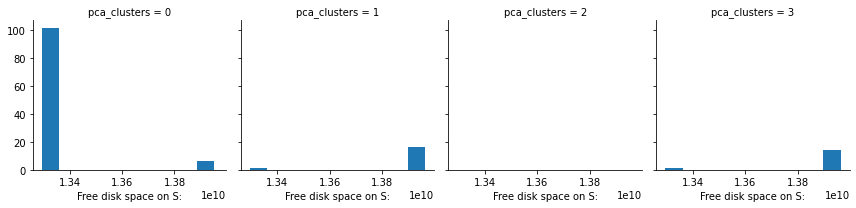

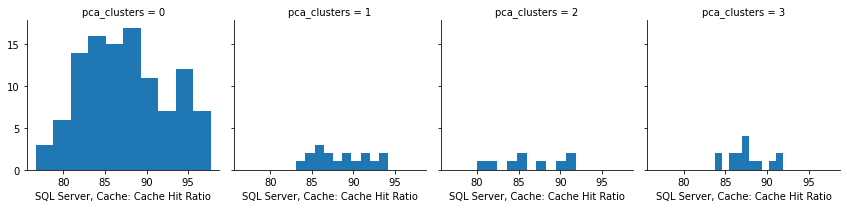

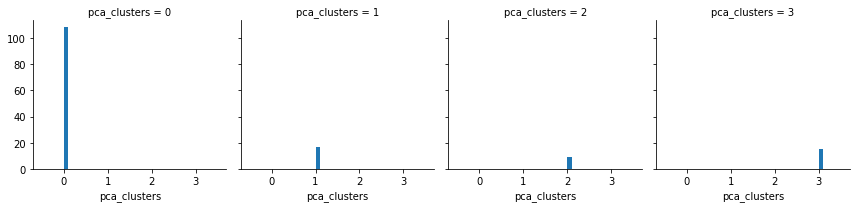

In [158]:
for c in cluster_pca_profile:
    grid = sns.FacetGrid(cluster_pca_profile, col='pca_clusters')
    grid.map(plt.hist, c)

In [160]:
# Bivariate

In [179]:
buffer_col = [x for x in cluster_pca_profile.columns if 'Buffer' in x]
buffer_col

['SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Target pages']

In [182]:
sql_col = [x for x in cluster_pca_profile.columns if 'SQL' in x]
sql_col

['SQL Server, Locks: Lock Waits per second (Total)',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Locks: Number of Deadlocks/sec (Total)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Statistics: Failed Auto-Params/sec',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Errors: Errors/sec (DB Offline Errors)',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Cache: Cache Pages',
 'SQL Server: Logins/sec',
 'SQL Server, Statistics: Unsafe Auto-Params/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Access Methods: Work files created/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Memory Manager: Total Server Memory',
 'SQL Server: % Processor Time',
 'SQL Server, Statistics: SQL Re-Compilations/sec',
 'SQL Server, Statistics: Safe Auto-Params/sec',
 'SQL Server, Statistics: SQL Compilations/Sec',
 'SQL Server, Access Me

In [177]:
cluster_pca_profile.groupby('pca_clusters')['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()
# (['pca_clusters','SQL Server, Buffer Manager: Page life expectancy(PLE)']).groups.keys()
# \
# [['pca_clusters','SQL Server, Buffer Manager: Page life expectancy(PLE)']].head()

count        mean        std      min      25%        50%  \
pca_clusters                                                              
0             108.0   42.225304  54.877676   1.7170   6.2513  19.212150   
1              17.0   53.715736  74.487910   2.0337   9.6519  12.085800   
2               9.0  102.419983  83.594208  11.6023  54.2275  74.637672   
3              15.0   93.393120  96.453183   8.3517  19.8290  36.524000   

                     75%       max  
pca_clusters                        
0              48.968100  168.2336  
1              74.637672  252.4338  
2             145.212400  291.1916  
3             189.612900  239.3645

In [183]:
cluster_pca_profile.groupby('pca_clusters')['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()
# (['pca_clusters','SQL Server, Buffer Manager: Page life expectancy(PLE)']).groups.keys()
# \
# [['pca_clusters','SQL Server, Buffer Manager: Page life expectancy(PLE)']].head()

count       mean       std      min        25%       50%  \
pca_clusters                                                             
0             108.0  99.975518  0.111512  99.0212  100.00000  100.0000   
1              17.0  97.752382  3.615722  88.0436   96.03780   99.7632   
2               9.0  98.894478  2.644730  91.8904   99.47470   99.9886   
3              15.0  99.945480  0.075707  99.7566   99.91435   99.9814   

                   75%    max  
pca_clusters                   
0             100.0000  100.0  
1             100.0000  100.0  
2              99.9987  100.0  
3              99.9956  100.0

In [185]:
cluster_pca_profile.groupby('pca_clusters').median()
#['SQL Server, Buffer Manager: % Buffer cache hit ratio'].median()

index  Total disk space on K:  Total disk space on J:  \
pca_clusters                                                            
0              1047.5            8.938692e+11            9.663355e+10   
1              7587.0            8.589902e+11            9.663355e+10   
2             34227.0            9.234148e+11            9.663355e+10   
3              2266.0            8.589902e+11            9.663355e+10   

              Total disk space on N:\LOGS  Total disk space on N:  \
pca_clusters                                                        
0                            5.365498e+09            2.899071e+11   
1                            5.365498e+09            2.899071e+11   
2                            5.365498e+09            2.899071e+11   
3                            5.365498e+09            2.899071e+11   

              SQL Server, Locks: Lock Waits per second (Total)  \
pca_clusters                                                     
0                                                          0.0   
1                                                          0.0   
2                                                          0.0   
3                                                          0.0   

              SQL Server, Buffer Manager: Page reads/sec  \
pca_clusters                                               
0                                                 0.0000   
1                                                 0.0000   
2                                                24.6141   
3                                               165.4119   

              Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
pca_clusters                                                                                                      
0                                                     1973400.0                                                   
1                                                   190064256.0                                                   
2                                                    39815760.0                                                   
3                                                    26772968.0                                                   

              SQL Server, Locks: Number of Deadlocks/sec (Total)  \
pca_clusters                                                       
0                                                           0.0    
1                                                           0.0    
2                                                           0.0    
3                                                           0.0    

              Free disk space on V:  ...  Total disk space on P:\LOGS  \
pca_clusters                         ...                                
0                      1.058223e+10  ...                 1.073710e+11   
1                      4.351590e+09  ...                 1.073710e+11   
2                      1.035099e+11  ...                 1.073710e+11   
3                      1.489502e+10  ...                 1.073710e+11   

              SQL Server, Locks: Average Wait Time (Total)  \
pca_clusters                                                 
0                                                      0.0   
1                                                     78.0   
2                                                      0.0   
3                                                      0.0   

              Free disk space on R:\LOGS  Free disk space on G:  \
pca_clusters                                                      
0                           5.037883e+09           2.848634e+10   
1                           5.037883e+09           4.033105e+10   
2                           5.037883e+09           4.018851e+10   
3                           5.037883e+09           4.033105e+10   

              Free disk space on N:\LOGS  Free disk space on H:\LOGS  \
pca_clusters     

In [186]:
cluster_pca_profile.groupby('pca_clusters').mean()
#['SQL Server, Buffer Manager: % Buffer cache hit ratio'].median()

index  Total disk space on K:  Total disk space on J:  \
pca_clusters                                                                 
0              1207.296296            8.925774e+11            9.663355e+10   
1              8766.176471            8.630937e+11            9.663355e+10   
2             31102.888889            9.201319e+11            9.663355e+10   
3              2332.666667            8.752671e+11            9.663355e+10   

              Total disk space on N:\LOGS  Total disk space on N:  \
pca_clusters                                                        
0                            5.365498e+09            2.899071e+11   
1                            5.365498e+09            2.899071e+11   
2                            5.365498e+09            2.899071e+11   
3                            5.365498e+09            2.899071e+11   

              SQL Server, Locks: Lock Waits per second (Total)  \
pca_clusters                                                     
0                                                     0.346447   
1                                                     0.695018   
2                                                     2.078622   
3                                                     2.560020   

              SQL Server, Buffer Manager: Page reads/sec  \
pca_clusters                                               
0                                             185.869125   
1                                            2652.679259   
2                                            3441.825033   
3                                             431.403993   

              Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000  \
pca_clusters                                                                                                      
0                                                  3.810239e+06                                                   
1                                                  2.975356e+08                                                   
2                                                  6.925948e+07                                                   
3                                                  7.943689e+07                                                   

              SQL Server, Locks: Number of Deadlocks/sec (Total)  \
pca_clusters                                                       
0                                                      0.000000    
1                                                      0.000000    
2                                                      0.000000    
3                                                      0.000003    

              Free disk space on V:  ...  Total disk space on P:\LOGS  \
pca_clusters                         ...                                
0                      1.281305e+10  ...                 1.073710e+11   
1                      8.677383e+09  ...                 1.073710e+11   
2                      9.437253e+10  ...                 1.073710e+11   
3                      1.313145e+10  ...                 1.073710e+11   

              SQL Server, Locks: Average Wait Time (Total)  \
pca_clusters                                                 
0                                                 5.341204   
1                                                88.131582   
2                                                29.500000   
3                                               401.336193   

              Free disk space on R:\LOGS  Free disk space on G:  \
pca_clusters                                                      
0                           5.037883e+09           2.914416e+10   
1                           5.037883e+09           3.997439e+10   
2                           5.037883e+09           3.858486e+10   
3                           5.037883e+09           4.032377e+10   

              Free disk space on N:\LOGS  Free disk space on H:\

<AxesSubplot:xlabel='pca_clusters'>

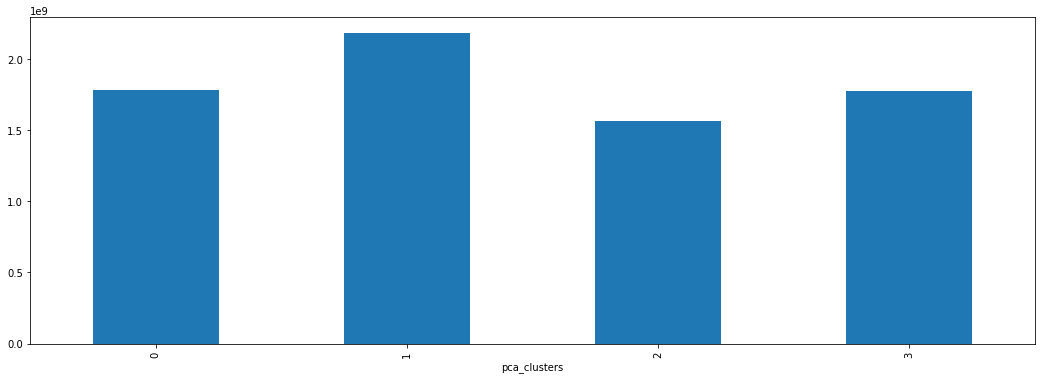

In [252]:
# plt.figure(figsize=(15,6))
cluster_pca_profile.groupby('pca_clusters')['Free memory'].mean().plot(kind='bar', figsize=(18,6))

In [198]:
df_11[buffer_col].mean()

SQL Server, Buffer Manager: Page reads/sec               6.179367e+02
SQL Server, Buffer Manager: Checkpoint pages/sec         1.182703e+01
SQL Server, Buffer Manager: Database pages               2.590021e+06
SQL Server, Buffer Manager: Page life expectancy(PLE)    7.463767e+01
SQL Server, Buffer Manager: Free list stalls/sec         1.197123e-03
SQL Server, Buffer Manager: Page lookups/sec             1.026483e+05
SQL Server, Buffer Manager: Read-ahead pages/sec         1.834369e+02
SQL Server, Buffer Manager: Lazy writes/sec              1.349359e+01
SQL Server, Buffer Manager: % Buffer cache hit ratio     9.959042e+01
SQL Server, Buffer Manager: Page writes/sec              1.128831e+02
SQL Server, Buffer Manager: Target pages                 6.550323e+07
dtype: float64

In [206]:
# PCA for only buffer col

In [209]:
df_data_scaled[buffer_col].shape

(149, 11)

In [216]:
pca_buffer = PCA(n_components=1)
pca_buffer.fit(df_data_scaled[buffer_col])
variance_buffer = pca_buffer.explained_variance_ratio_ 
var_buffer = np.cumsum(np.round(variance_buffer, 3)*100)
# plt.figure(figsize=(12,6))
# plt.ylabel('% Variance Explained')
# plt.xlabel('# of Features')
# plt.title('PCA Analysis - Buffer Columns')
# plt.ylim(0,100.5)
# plt.plot(var_buffer)

In [217]:
# variance_buffer
var_buffer

array([95.2])

In [241]:
def pca_col(df, n_component):
    pca_temp = PCA(n_components=n_component)
    pca_temp.fit(df)
    variance_temp = pca_temp.explained_variance_ratio_ 
    var_temp = np.cumsum(np.round(variance_temp, 3)*100)
    print(var_temp)

In [221]:
pca_col(df_data_scaled[sql_col])

[95.8]


In [222]:
pca_col(df_data_scaled[buffer_col])

[95.2]


In [231]:
traffic_col = [x for x in df_11.columns if 'traffic' in x]
# [x for x in df_11.columns if 'traffic' in x]

In [233]:
pca_col(df_data_scaled[traffic_col])

[88.4]


In [251]:
[x for x in df_11.columns if 'Processor' in x]

['Processor load (5 min average)',
 'Processor load (15 min average)',
 'SQL Server: % Processor Time']

In [254]:
# len([x for x in df_11.columns if 'Free disk' in x])
pca_col(df_data_scaled[[x for x in df_11.columns if 'traffic' in x]], 1)

[88.4]


In [234]:
len(traffic_col) + len(sql_col)

64

In [312]:
# ord()
chr(61)

'='

In [317]:
print('\u0061')
print('\u0061')

print('\x61')
# print(chr(61))

print('\U00000061')

a
a
a
a
